# Introduction (DO NOT RUN) #

In [ ]:
import pandas as pd
from langdetect import detect, LangDetectException
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_paths = ['news-week-17aug24.csv', 'news-week-18aug24.csv']

def detect_language(text):
    try:
        if pd.notnull(text) and isinstance(text, str):
            return detect(text)
        else:
            return "non-text or empty"
    except LangDetectException:
        return "error"

for file_path in file_paths:
    # Load your data
    df = pd.read_csv(file_path)

    tqdm.pandas(desc=f"Detecting language for {file_path}")
    df['language'] = df['headline_text'].progress_apply(detect_language)

    # Save the DataFrame with the language column
    df.to_csv(f'language_detected_{file_path}', index=False)
    print(f"Saved full data with language detection to language_detected_{file_path}")

    # Filter out only the rows where the detected language is English
    english_df = df[df['language'] == 'en']

    # Save the English only DataFrame
    english_df.to_csv(f'english_only_{file_path}', index=False)
    print(f"Saved English only data to english_only_{file_path}")


Detecting language for news-week-17aug24.csv: 100%|███████████████████████| 1395586/1395586 [2:27:11<00:00, 158.02it/s]


Saved full data with language detection to language_detected_news-week-17aug24.csv
Saved English only data to english_only_news-week-17aug24.csv


Detecting language for news-week-18aug24.csv: 100%|███████████████████████| 1909739/1909739 [3:05:14<00:00, 171.82it/s]


Saved full data with language detection to language_detected_news-week-18aug24.csv
Saved English only data to english_only_news-week-18aug24.csv


C:\Users\97258\AppData\Local\Temp\ipykernel_8516\4229799572.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts_2017.index, y=language_counts_2017.values, palette='viridis', ax=ax[0])
C:\Users\97258\AppData\Local\Temp\ipykernel_8516\4229799572.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts_2018.index, y=language_counts_2018.values, palette='viridis', ax=ax[1])


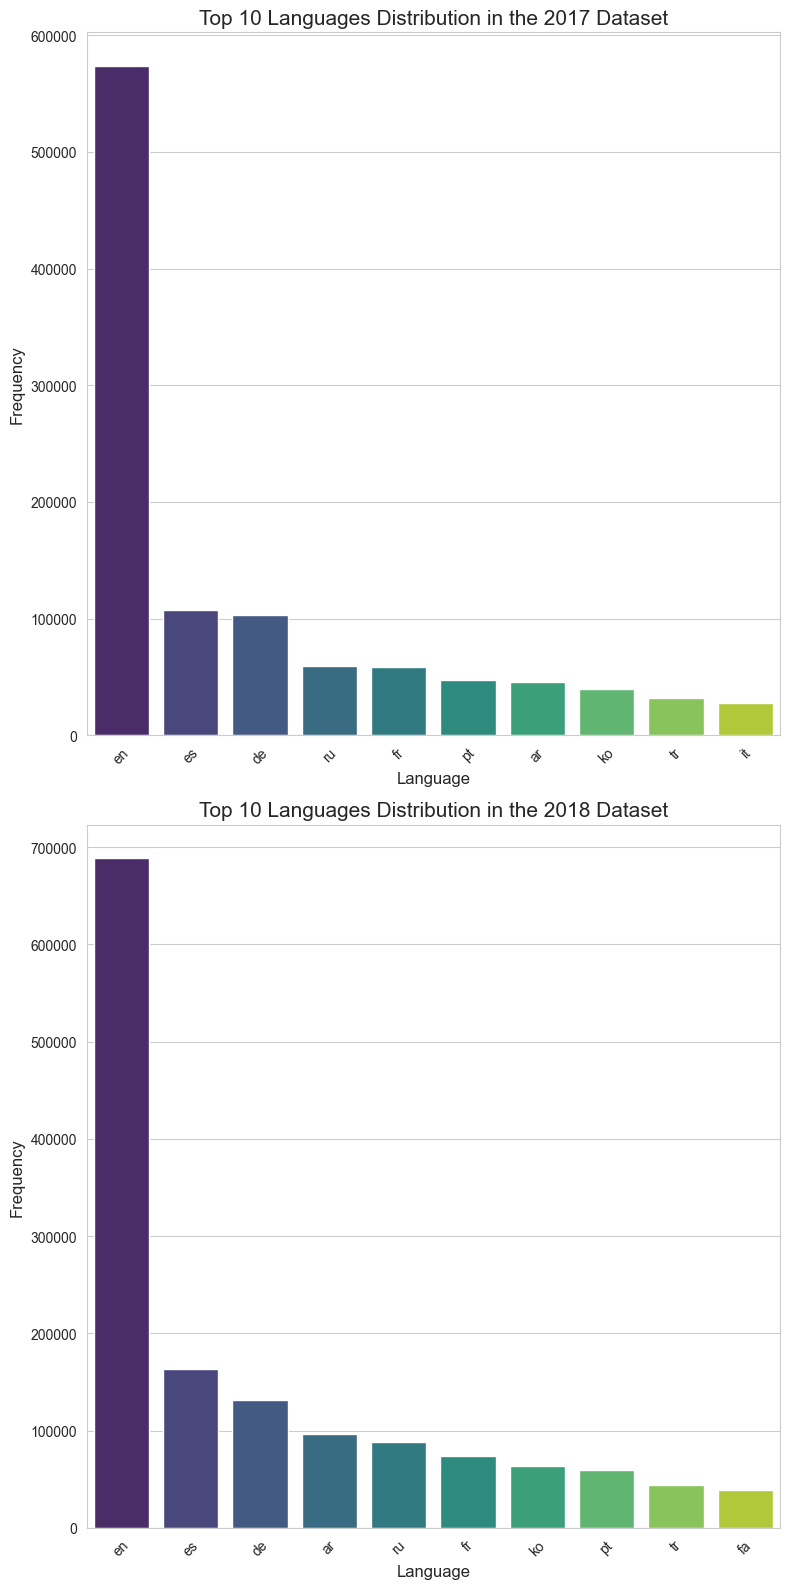

In [21]:
# Load the data from the two CSV files
file_path_2017 = 'language_detected_news-week-17aug24.csv'  
file_path_2018 = 'language_detected_news-week-18aug24.csv'  
  # Update with the actual path to your 2018 data
df_2017 = pd.read_csv(file_path_2017)
df_2018 = pd.read_csv(file_path_2018)

# Prepare the data: get counts of each language and select the top 10 for each year
language_counts_2017 = df_2017['language'].value_counts().nlargest(10)
language_counts_2018 = df_2018['language'].value_counts().nlargest(10)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots: one row, two columns
fig, ax = plt.subplots(2, 1, figsize=(8, 16))

# Plotting the histogram for the 2017 data
sns.barplot(x=language_counts_2017.index, y=language_counts_2017.values, palette='viridis', ax=ax[0])
ax[0].set_title('Top 10 Languages Distribution in the 2017 Dataset', fontsize=15)
ax[0].set_xlabel('Language', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

# Plotting the histogram for the 2018 data
sns.barplot(x=language_counts_2018.index, y=language_counts_2018.values, palette='viridis', ax=ax[1])
ax[1].set_title('Top 10 Languages Distribution in the 2018 Dataset', fontsize=15)
ax[1].set_xlabel('Language', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

plt.savefig('language_distribution_2017_2018.png')

# Show the plot
plt.tight_layout()
plt.show()


# 1. Data Selection and Preparation #

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

## Data Selection ##

From the whole dataset, we have decided to take a subset with only english texts. As we can see on the bar plots above, the majority of headline texts in both datasets are written in english.

### Data Loading ###

In [2]:
df_2017 = pd.read_csv('english_only_news-week-17aug24.csv')
df_2018 = pd.read_csv('english_only_news-week-18aug24.csv')

In [3]:
display(df_2017.head())

,publish_time,feed_code,source_url,headline_text,language
0,201708240000,w3-adweek,http://www.adweek.com/digital/facebook-2017-gl...,Here Are the Details on Facebook's Global Part...,en
1,201708240000,w3-auto-economictimes-indiatimes,http://auto.economictimes.indiatimes.com/news/...,Petrol & diesel on the rise post daily price r...,en
2,201708240000,w3-azdailysun,http://azdailysun.com/sports/football/could-de...,Could DeShone Kizer end Browns' history of QB ...,en
3,201708240000,w3-betanews,https://betanews.com/2017/08/23/no-more-forced...,Comment on Microsoft will never again sneakily...,en
4,201708240000,w3-betanews,https://betanews.com/2017/08/23/what-is-google...,Comment on What is Google Chrome Enterprise? b...,en


In [4]:
display(df_2018.head())

,publish_time,feed_code,source_url,headline_text,language
0,201808240000,w3-asianage,http://www.asianage.com/metros/mumbai/240818/2...,"21,000 tree falling incidents claimed 30 lives...",en
1,201808240000,w3-asianage,http://www.asianage.com/metros/mumbai/240818/c...,Cities fail to create action plan to combat po...,en
2,201808240000,w3-benarnews-org,https://www.benarnews.org/english/news/indones...,Australia Issues Warning About Potential Indon...,en
3,201808240000,w3-blog-mlive,https://www.mlive.com/news/ann-arbor/index.ssf...,"UMich professor, opera singer on leave amid ra...",en
4,201808240000,w3-businessinsider,https://www.businessinsider.com/revival-afford...,This vintage rug company is on track to make $...,en


## Data Preparation ##

Let's organize and refine the data for deeper examination. Initially, we'll convert the publication timestamps into datetime format to facilitate temporal studies. Next, we'll purify the text data from the headline text column by discarding stop words and applying additional necessary cleaning processes.

### Preprocess publish_time ###

In [5]:
def parse_publish_time(df):
    df['publish_time'] = df['publish_time'].astype(str)

    # Parse 'publish_time' to datetime format (YYYY-MM-DD HH:MM)
    df['datetime'] = pd.to_datetime(df['publish_time'], format='%Y%m%d%H%M')

    # Extracting year, month, day, hour, and minute
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute

    return df

# Apply the function to your DataFrames
df_2017 = parse_publish_time(df_2017)
df_2018 = parse_publish_time(df_2018)

### clean headline_text ###

In [6]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Set of stop words
stop_words = set(stopwords.words('english'))

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):  
        return ""  
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    text = ' '.join(cleaned_tokens)
    return text

tqdm.pandas(desc="Cleaning 2017 Data")
df_2017['cleaned_headline'] = df_2017['headline_text'].progress_apply(clean_text)

tqdm.pandas(desc="Cleaning 2018 Data")
df_2018['cleaned_headline'] = df_2018['headline_text'].progress_apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharonsalabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sharonsalabi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharonsalabi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Cleaning 2018 Data: 100%|████████████████████████████████████████████████████| 688563/688563 [01:11<00:00, 9582.29it/s]


### Save & Store ###

In [7]:
df_2017.to_csv('cleaned_df_2017.csv', index=False)
df_2018.to_csv('cleaned_df_2018.csv', index=False)

# 3. EDA and Visualization #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
df_2017 = pd.read_csv('cleaned_df_2017.csv')
df_2018 = pd.read_csv('cleaned_df_2018.csv')
# Ensure that the 'cleaned_headline' column is string
df_2017['cleaned_headline'] = df_2017['cleaned_headline'].astype(str)
df_2018['cleaned_headline'] = df_2018['cleaned_headline'].astype(str)

## a) General and Descriptive Analysis ##

2017 Statistics:
Count: 573721, Mean: 51.76087854549511, Median: 49.0, Range: 3796, Variance: 533.0838720680923, Standard Deviation: 23.088609141048153
2018 Statistics:
Count: 688563, Mean: 53.098760752465644, Median: 50.0, Range: 4530, Variance: 504.5718445117588, Standard Deviation: 22.462676699622392


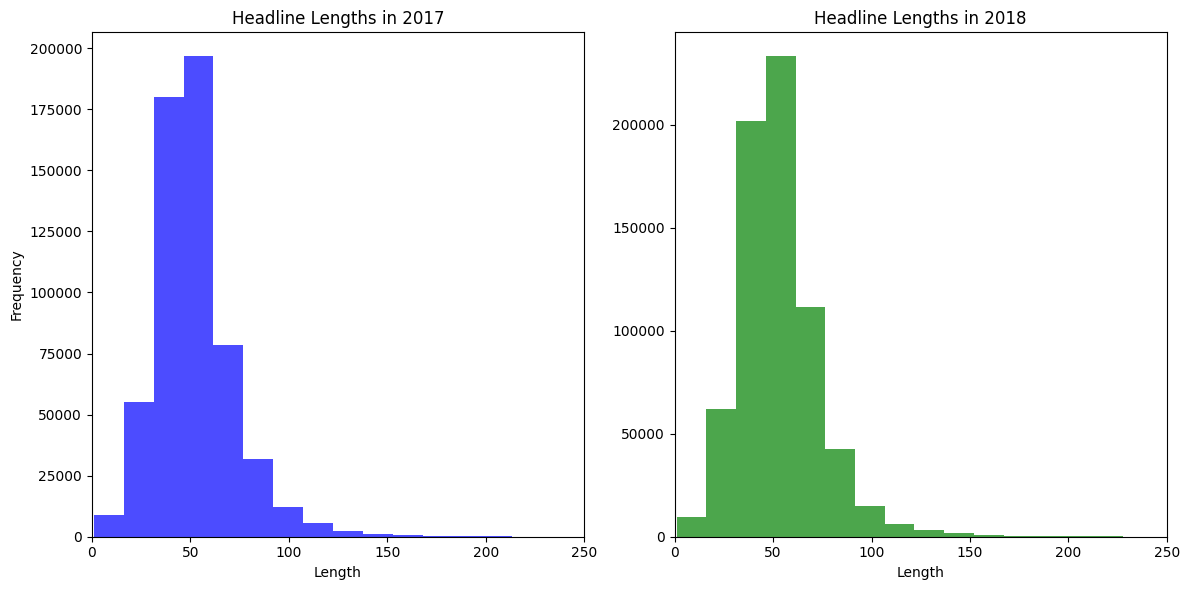

In [12]:
# Function to calculate and plot statistics for cleaned_headlines
def analyze_headlines(df_2017, df_2018):
    # Prepare the data: Calculate the length of each headline
    df_2017['length'] = df_2017['cleaned_headline'].apply(len)
    df_2018['length'] = df_2018['cleaned_headline'].apply(len)

    # Calculate statistics for 2017
    count_2017 = len(df_2017)
    mean_2017 = np.mean(df_2017['length'])
    median_2017 = np.median(df_2017['length'])
    range_2017 = np.ptp(df_2017['length'])
    variance_2017 = np.var(df_2017['length'])
    std_dev_2017 = np.std(df_2017['length'])

    # Calculate statistics for 2018
    count_2018 = len(df_2018)
    mean_2018 = np.mean(df_2018['length'])
    median_2018 = np.median(df_2018['length'])
    range_2018 = np.ptp(df_2018['length'])
    variance_2018 = np.var(df_2018['length'])
    std_dev_2018 = np.std(df_2018['length'])

    # Print the statistics
    print(f"2017 Statistics:\nCount: {count_2017}, Mean: {mean_2017}, Median: {median_2017}, Range: {range_2017}, Variance: {variance_2017}, Standard Deviation: {std_dev_2017}")
    print(f"2018 Statistics:\nCount: {count_2018}, Mean: {mean_2018}, Median: {median_2018}, Range: {range_2018}, Variance: {variance_2018}, Standard Deviation: {std_dev_2018}")

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Histogram of headline lengths for 2017
    plt.subplot(1, 2, 1)
    plt.hist(df_2017['length'], color='blue', alpha=0.7, bins=250)
    plt.title('Headline Lengths in 2017')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.xlim(0, 250)
    # Histogram of headline lengths for 2018
    plt.subplot(1, 2, 2)
    plt.hist(df_2018['length'], color='green', alpha=0.7, bins=300)
    plt.title('Headline Lengths in 2018')
    plt.xlabel('Length')
    plt.xlim(0, 250)
    plt.tight_layout()
    plt.show()

analyze_headlines(df_2017, df_2018)

## b) Frequency Analysis ##

### Frequent Words Visualizations ###

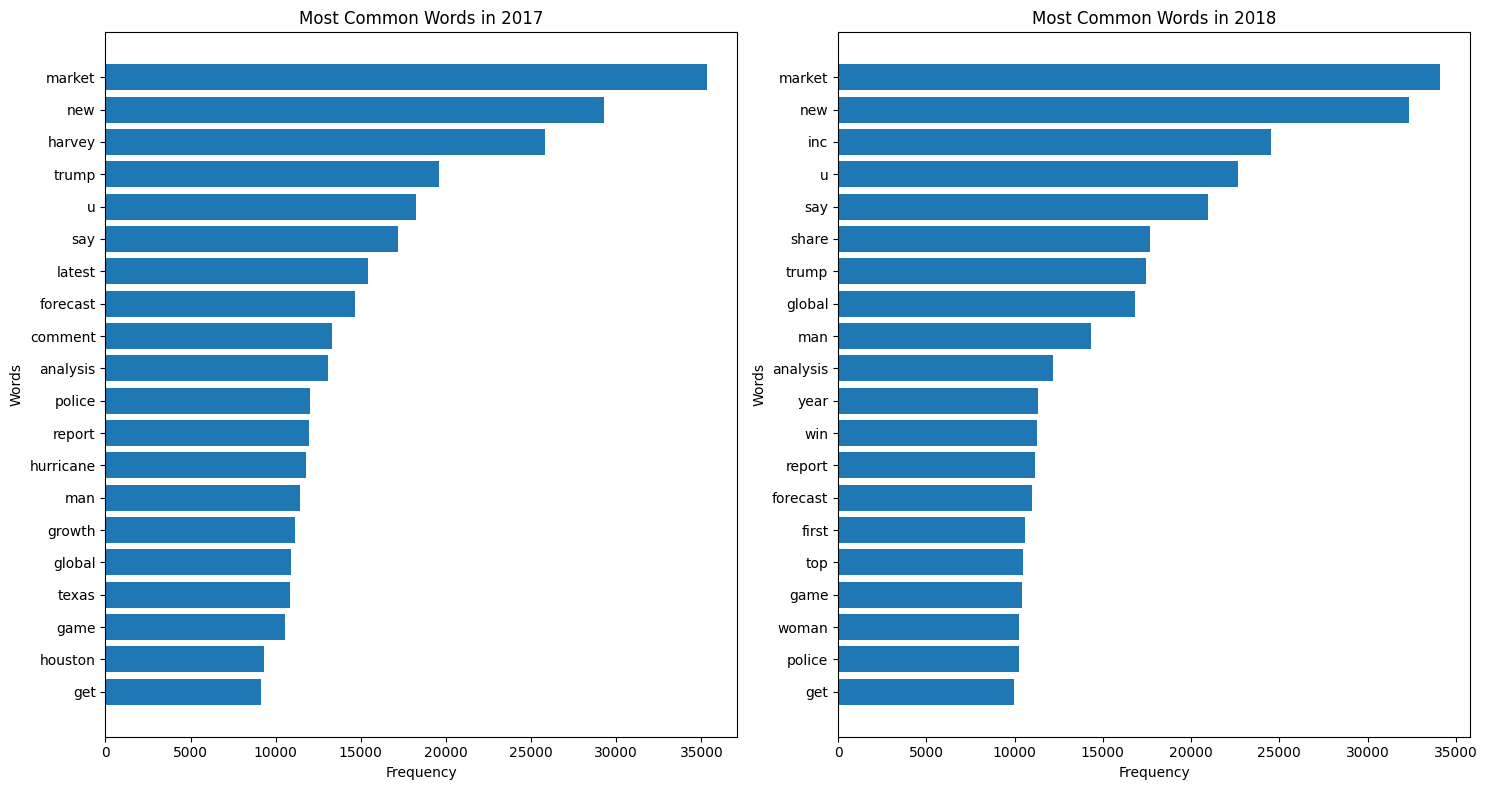

In [3]:
# get words frequency
def get_frequency(df):
    # Join all headlines into a single text, ensuring each is a string
    all_headlines = ' '.join(str(headline) for headline in df['cleaned_headline'] if isinstance(headline, str))
    # Tokenize the text
    words = all_headlines.split()
    # Get word frequency
    word_freq = Counter(words)
    return word_freq

def plot_common_words_side_by_side(freq_2017, freq_2018, n=20):
    # Get the n most common words for each year
    common_words_2017 = freq_2017.most_common(n)
    common_words_2018 = freq_2018.most_common(n)

    words_2017 = [word[0] for word in common_words_2017]
    counts_2017 = [word[1] for word in common_words_2017]
    words_2018 = [word[0] for word in common_words_2018]
    counts_2018 = [word[1] for word in common_words_2018]

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # 2017 bar plot
    axes[0].barh(words_2017[::-1], counts_2017[::-1])
    axes[0].set_title('Most Common Words in 2017')
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Words')

    # 2018 bar plot
    axes[1].barh(words_2018[::-1], counts_2018[::-1])
    axes[1].set_title('Most Common Words in 2018')
    axes[1].set_xlabel('Frequency')
    axes[1].set_ylabel('Words')
    plt.savefig('common_words_2017_2018.png')

    plt.tight_layout()
    plt.show()
    
# Get frequency data
freq_2017 = get_frequency(df_2017)
freq_2018 = get_frequency(df_2018)
plot_common_words_side_by_side(freq_2017, freq_2018)

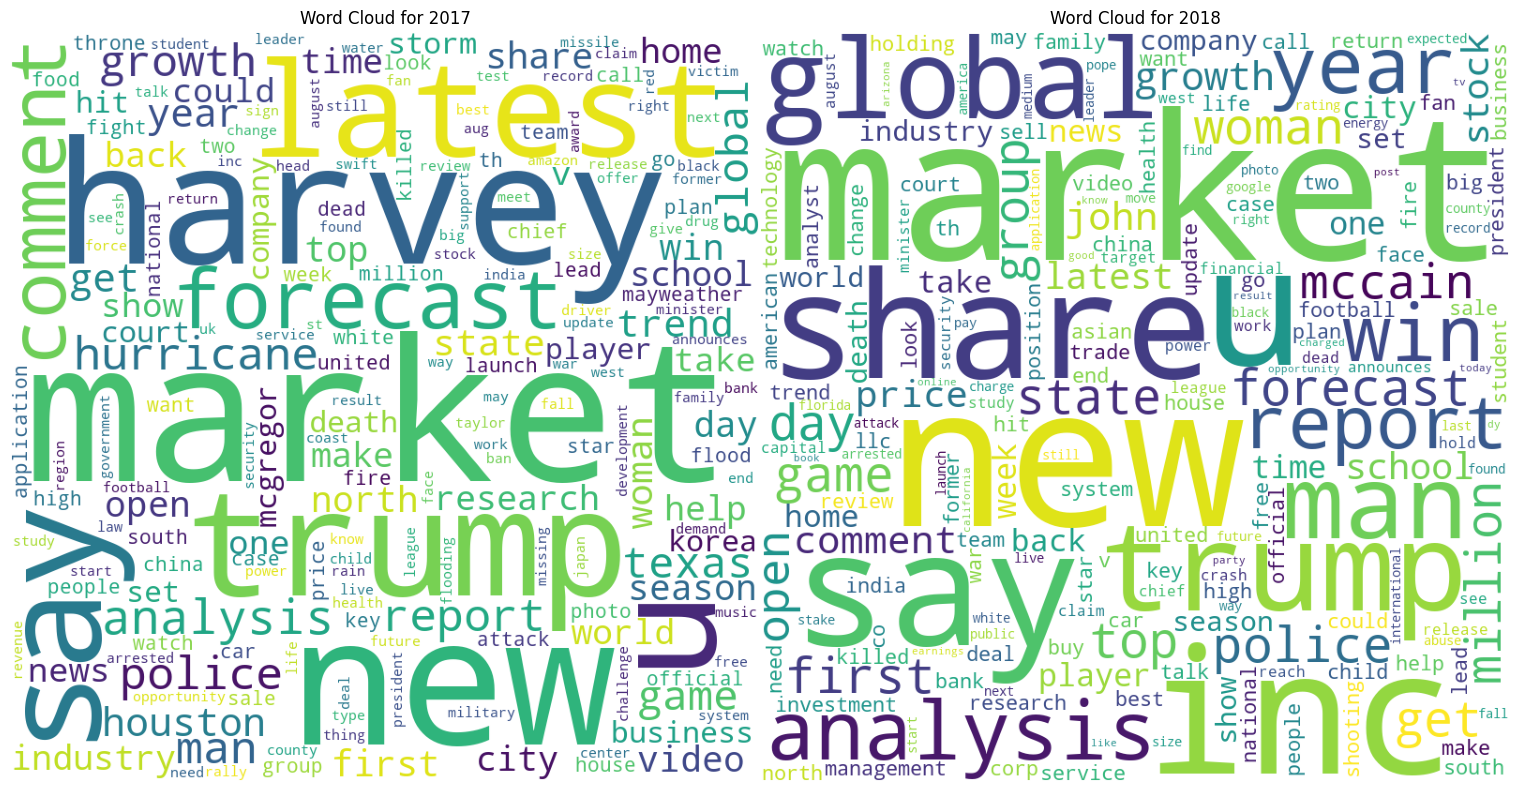

In [4]:
def create_wordcloud_side_by_side(freq_2017, freq_2018):
    # Create WordCloud objects
    wordcloud_2017 = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(freq_2017)
    wordcloud_2018 = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(freq_2018)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 15))

    # 2017 WordCloud
    axes[0].imshow(wordcloud_2017)
    axes[0].set_title('Word Cloud for 2017')
    axes[0].axis('off')

    # 2018 WordCloud
    axes[1].imshow(wordcloud_2018)
    axes[1].set_title('Word Cloud for 2018')
    axes[1].axis('off')
    plt.savefig('wordclouds_2017_2018.png')

    plt.tight_layout(pad=0)
    plt.show()

create_wordcloud_side_by_side(freq_2017, freq_2018)

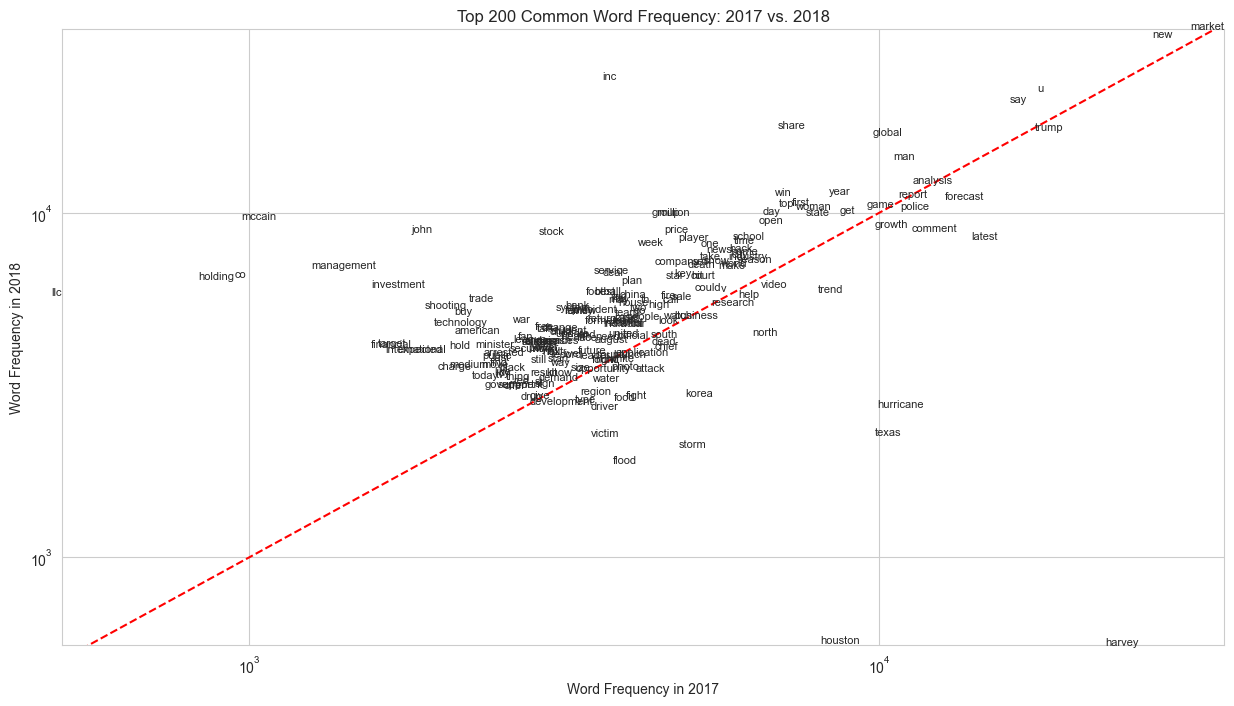

In [19]:
def plot_frequency_comparison_with_labels(freq_2017, freq_2018, top_n=50):
    # Find common words between the two datasets
    common_words = set(freq_2017.keys()) & set(freq_2018.keys())
    
    # Get the top N most frequent common words based on their average frequency in both years
    top_common_words = sorted(common_words, key=lambda word: (freq_2017[word] + freq_2018[word])/2, reverse=True)[:top_n]
    
    # Create scatter plot
    plt.figure(figsize=(15, 8))  # Set the figure size to be more rectangular
    
    # Define the limits for the axes
    min_freq_2017 = max(min(freq_2017[word] for word in top_common_words), 1)
    max_freq_2017 = max(freq_2017[word] for word in top_common_words)
    min_freq_2018 = max(min(freq_2018[word] for word in top_common_words), 1)
    max_freq_2018 = max(freq_2018[word] for word in top_common_words)
    
    # Plot each word at its respective 2017 and 2018 frequency coordinates
    for word in top_common_words:
        plt.text(freq_2017[word], freq_2018[word], word, fontsize=8, ha='right')
    
    # Plot the identity line based on the overall min and max
    overall_min_freq = min(min_freq_2017, min_freq_2018)
    overall_max_freq = max(max_freq_2017, max_freq_2018)
    plt.plot([overall_min_freq, overall_max_freq], [overall_min_freq, overall_max_freq], 'r--')
    
    plt.title(f'Top {top_n} Common Word Frequency: 2017 vs. 2018')
    plt.xlabel('Word Frequency in 2017')
    plt.ylabel('Word Frequency in 2018')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(min_freq_2017, max_freq_2017)
    plt.ylim(min_freq_2018, max_freq_2018)
    plt.grid(True)
    plt.show()


plot_frequency_comparison_with_labels(freq_2017, freq_2018, top_n=200)

### TF-IDF ###

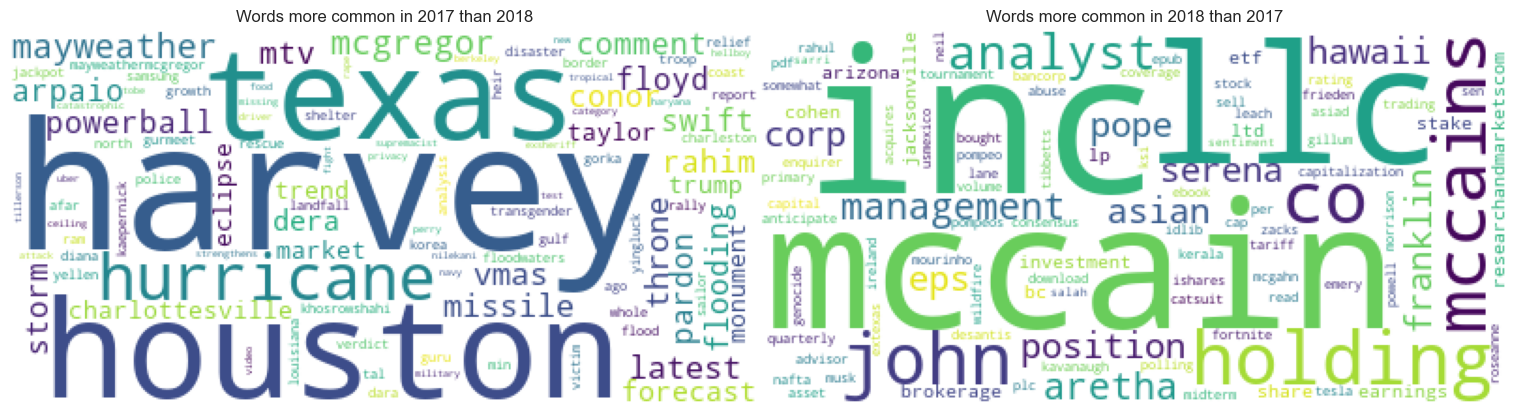

In [18]:
def calculate_tfidf_scores(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_headline'].dropna())
    normalized_scores = normalize(tfidf_matrix, axis=0)
    avg_scores = np.array(normalized_scores.mean(axis=0)).flatten()
    words = tfidf_vectorizer.get_feature_names_out()
    return dict(zip(words, avg_scores))

def create_differential_wordcloud(tfidf_2017, tfidf_2018, year):
    # Calculate differential scores
    differential_scores = {word: tfidf_2017.get(word, 0) - tfidf_2018.get(word, 0) for word in tfidf_2017}
    
    # Filter out words that are not significantly more common in one year
    selected_words = {word: score for word, score in differential_scores.items() if score > 0.00001}
    
    # Create and return a word cloud from the selected words
    wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(selected_words)
    return wordcloud

# Calculate TF-IDF scores for each year
tfidf_2017 = calculate_tfidf_scores(df_2017)
tfidf_2018 = calculate_tfidf_scores(df_2018)

# Create differential word clouds
wordcloud_2017 = create_differential_wordcloud(tfidf_2017, tfidf_2018, 2017)
wordcloud_2018 = create_differential_wordcloud(tfidf_2018, tfidf_2017, 2018)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 15))

# 2017 WordCloud
axes[0].imshow(wordcloud_2017)
axes[0].set_title('Words more common in 2017 than 2018')
axes[0].axis('off')

# 2018 WordCloud
axes[1].imshow(wordcloud_2018)
axes[1].set_title('Words more common in 2018 than 2017')
axes[1].axis('off')

plt.tight_layout(pad=0)
plt.savefig('differential_wordclouds_2017_2018.png')
plt.show()

### N-Grams ###

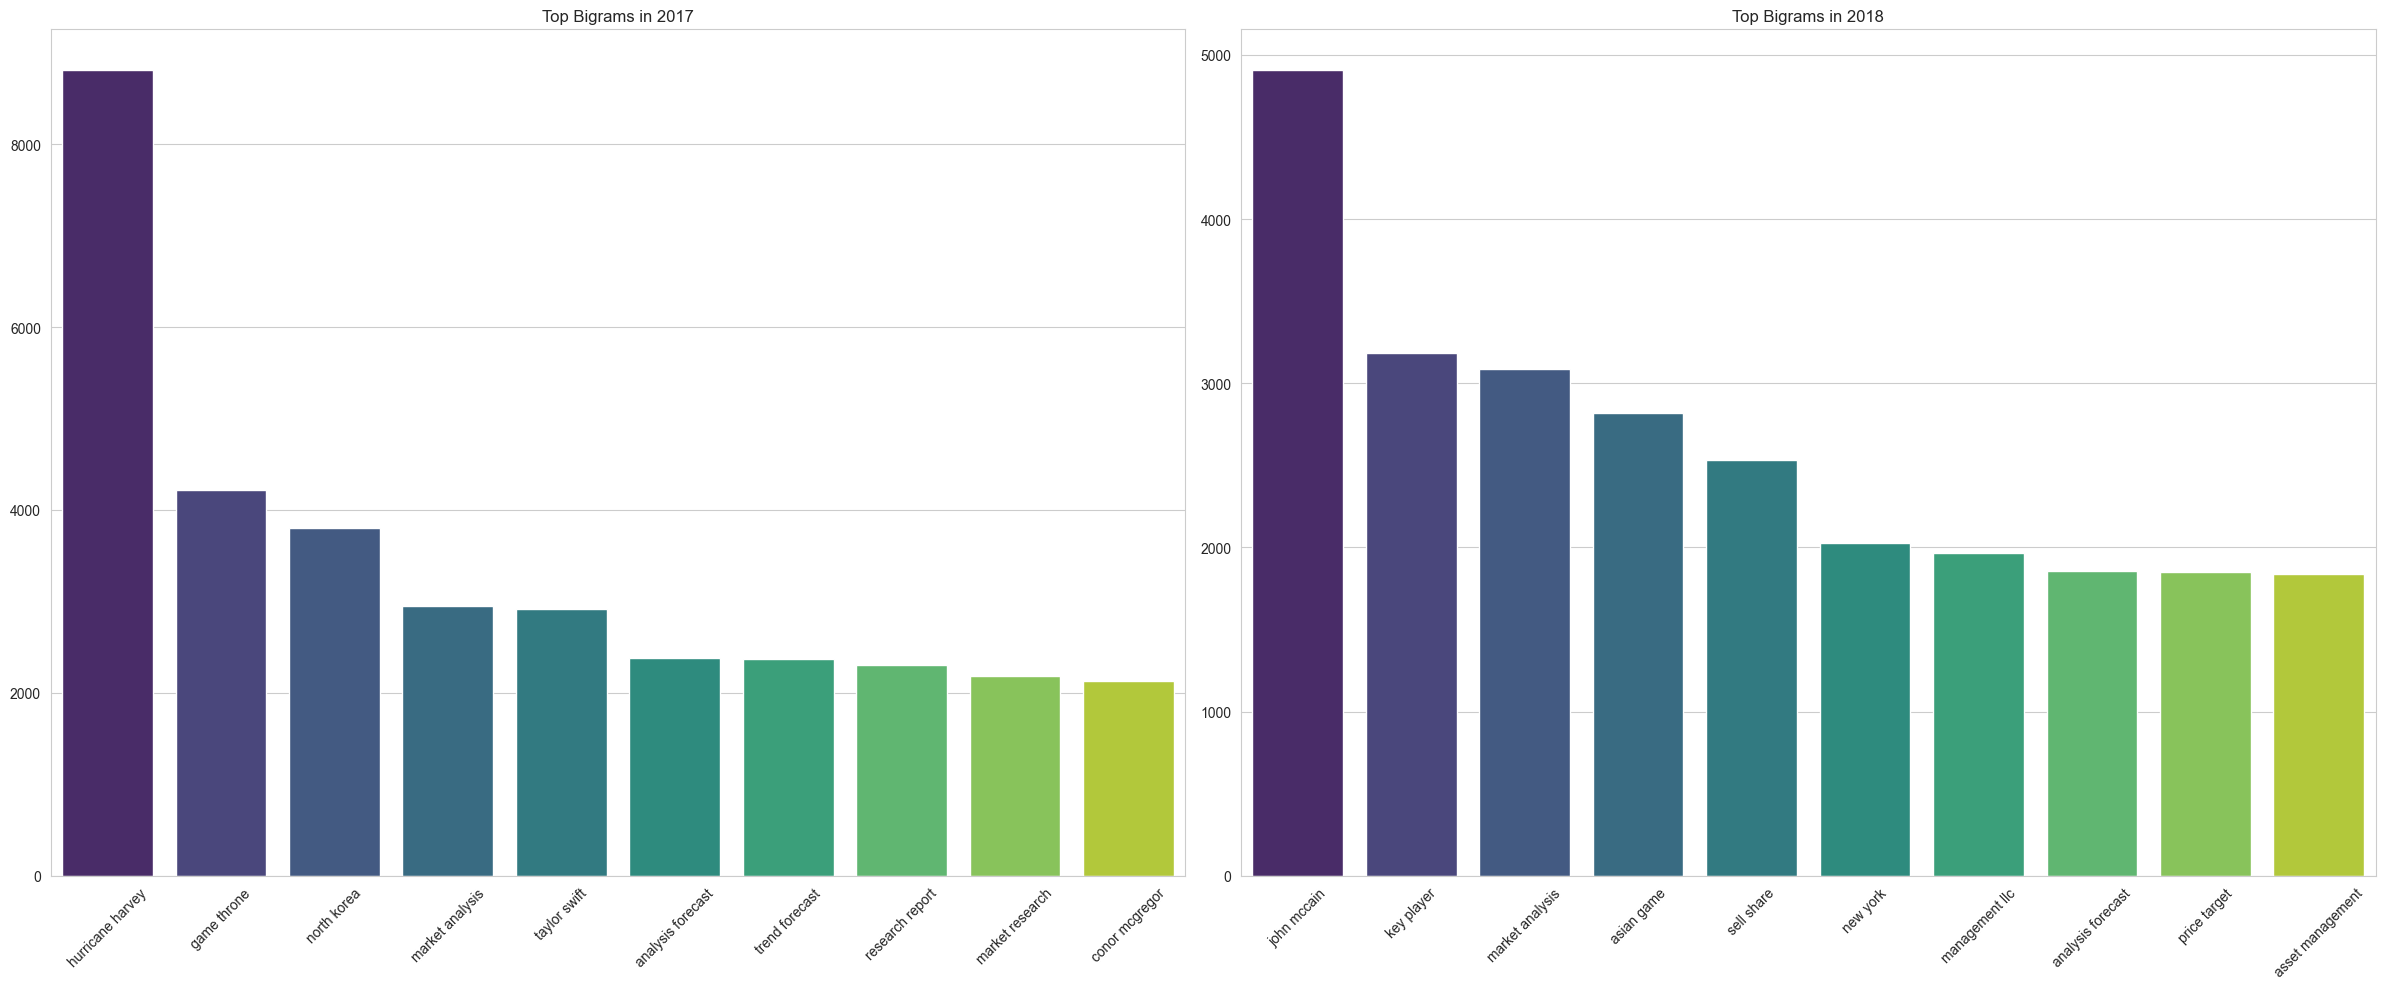

In [6]:
# Function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


def plot_ngrams_side_by_side(top_ngrams_2017, top_ngrams_2018, title_2017, title_2018):
    ngrams_2017 = [item[0] for item in top_ngrams_2017]
    counts_2017 = [item[1] for item in top_ngrams_2017]
    ngrams_2018 = [item[0] for item in top_ngrams_2018]
    counts_2018 = [item[1] for item in top_ngrams_2018]

    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Increase the figure size
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))

    # Plot 2017 n-grams
    sns.barplot(x=ngrams_2017, y=counts_2017, ax=axes[0], palette='viridis')
    axes[0].set_title(title_2017)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate labels

    # Plot 2018 n-grams
    sns.barplot(x=ngrams_2018, y=counts_2018, ax=axes[1], palette='viridis')
    axes[1].set_title(title_2018)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate labels

    # Adjust layout
    plt.subplots_adjust(bottom=0.25)  # Adjust the bottom
    plt.tight_layout()  # Adjust layout

    # Save the figure
    plt.savefig(f'{title_2017[4]}-grams_2017_2018.png')
    plt.show()



# Get top bigrams and trigrams for 2017 and 2018
top_bigrams_2017 = get_top_ngrams(df_2017['cleaned_headline'], n=10, ngram_range=(2, 2))
top_bigrams_2018 = get_top_ngrams(df_2018['cleaned_headline'], n=10, ngram_range=(2, 2))

# Plotting bigrams side by side
plot_ngrams_side_by_side(top_bigrams_2017, top_bigrams_2018, 'Top Bigrams in 2017', 'Top Bigrams in 2018')

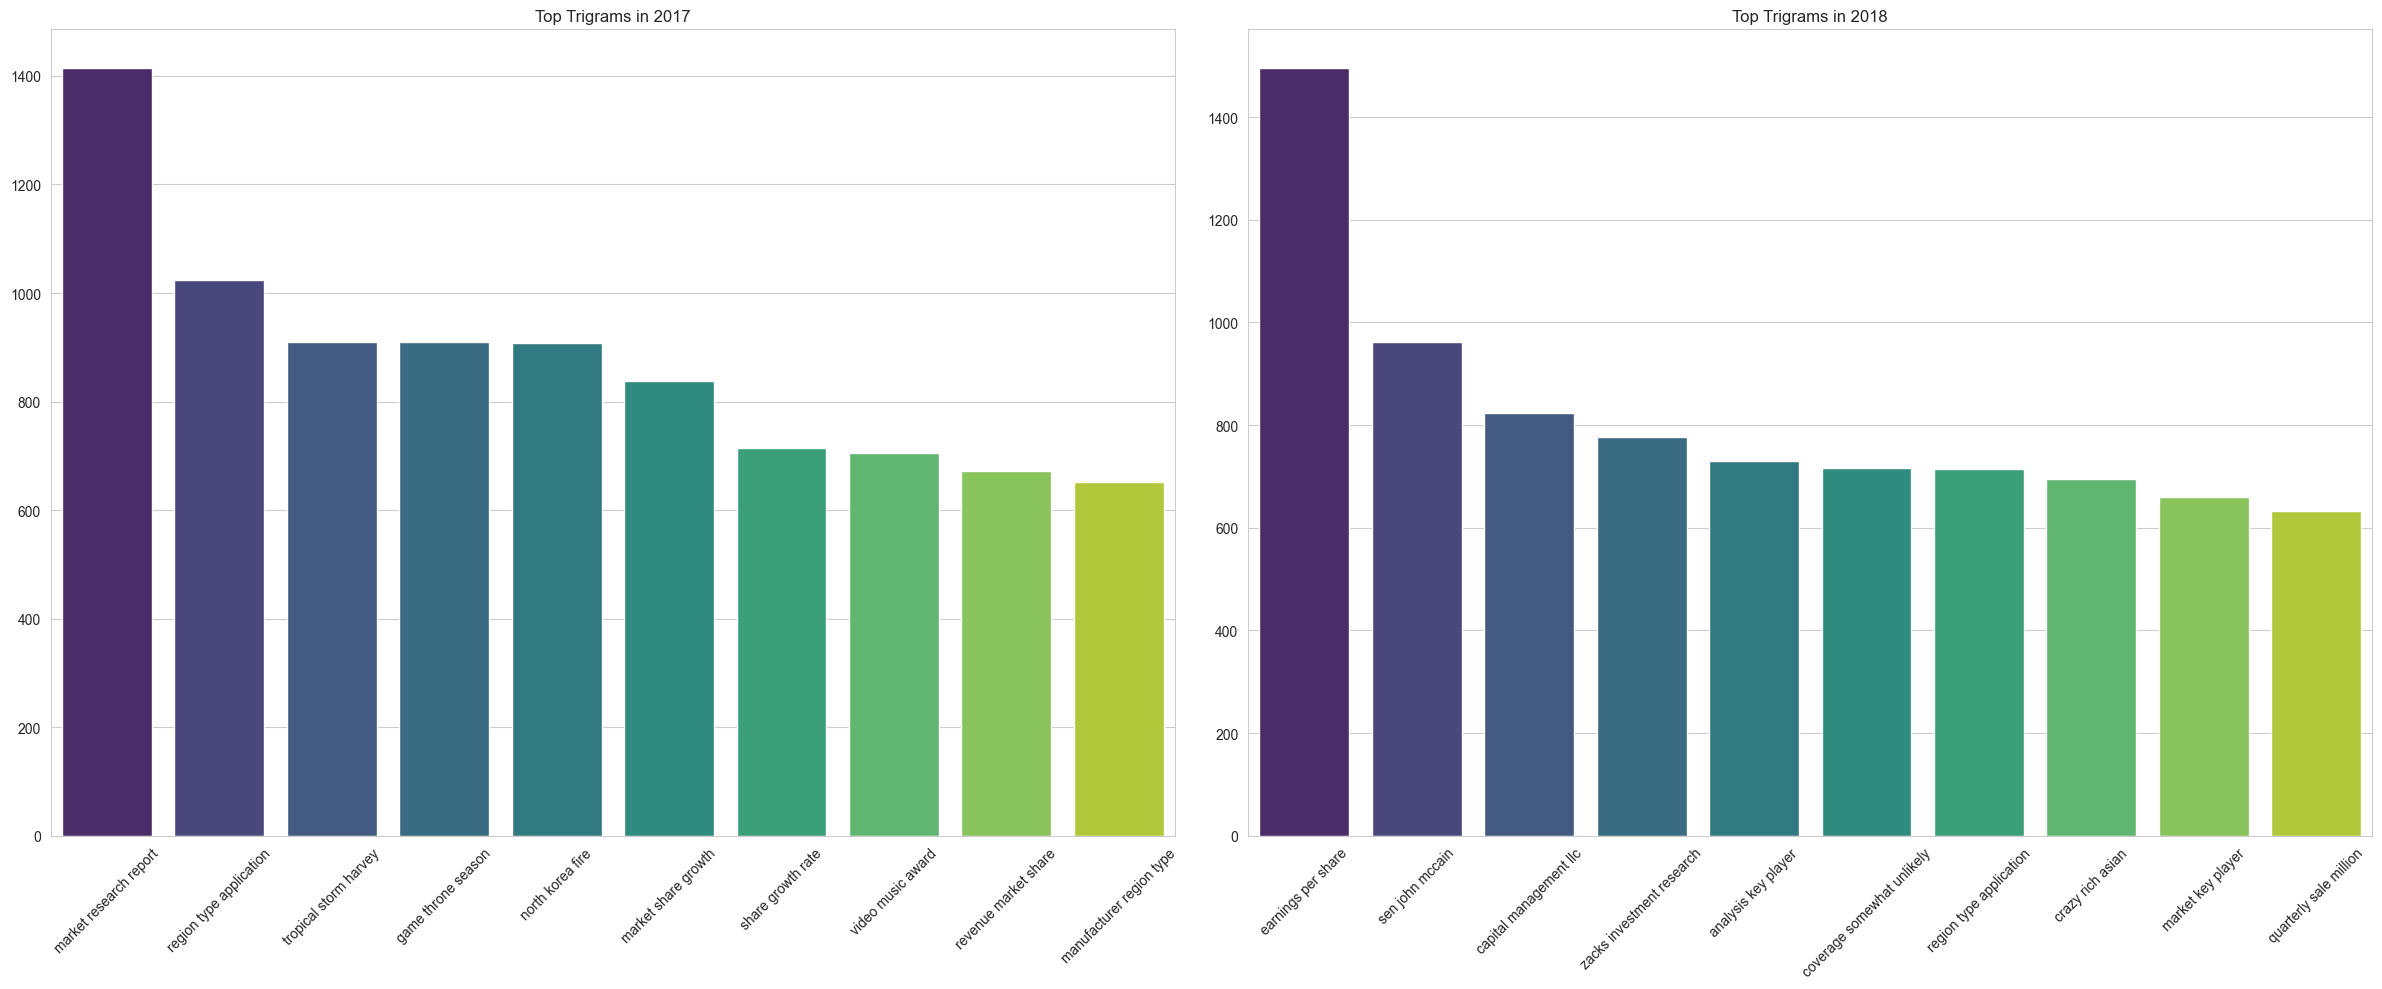

In [7]:
top_trigrams_2017 = get_top_ngrams(df_2017['cleaned_headline'], n=10, ngram_range=(3, 3))
top_trigrams_2018 = get_top_ngrams(df_2018['cleaned_headline'], n=10, ngram_range=(3, 3))

# Plotting trigrams side by side
plot_ngrams_side_by_side(top_trigrams_2017, top_trigrams_2018, 'Top Trigrams in 2017', 'Top Trigrams in 2018')

## c) Temporal Analysis ##

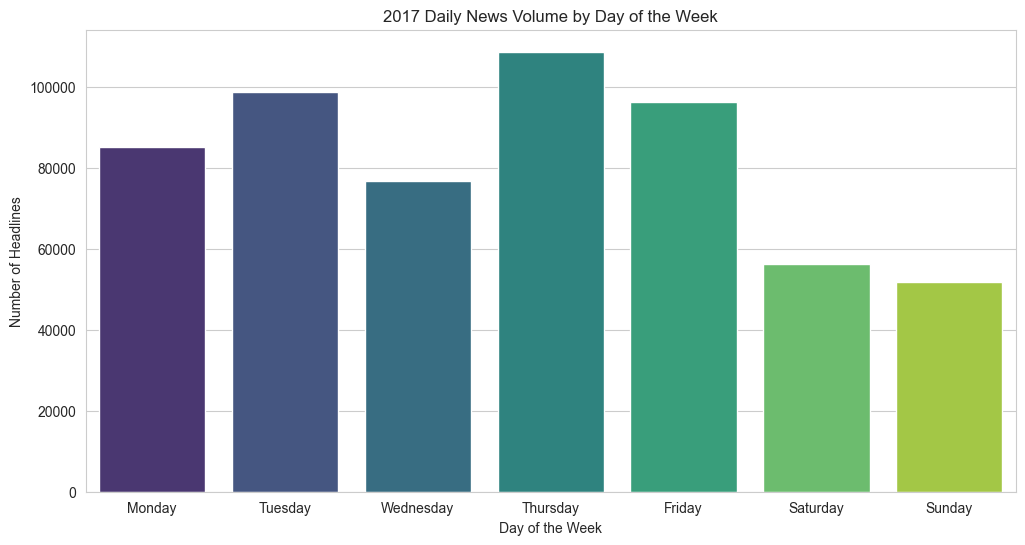

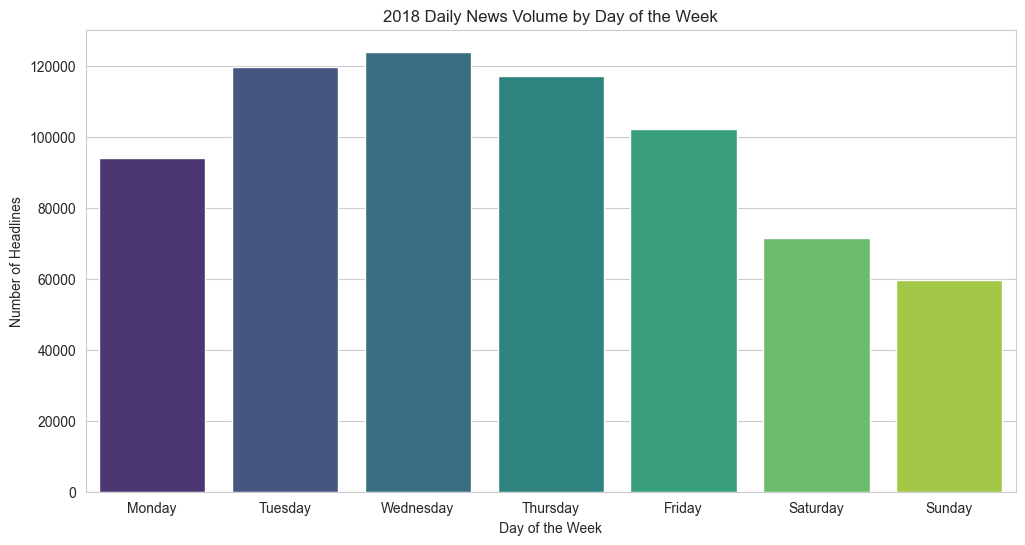

In [19]:
def plot_daily_news_volume_by_weekday(df, year):
    # Convert 'datetime' to datetime object and create necessary columns
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['date'] = df['datetime'].dt.date

    # Calculate daily volume
    daily_counts = df.groupby('day_of_week').size().reset_index(name='counts')

    # Map the day of the week from numbers to names
    days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    daily_counts['day_name'] = daily_counts['day_of_week'].map(days_of_week)

    # Plot the daily news volume
    plt.figure(figsize=(12, 6))
    sns.barplot(x='day_name', y='counts', data=daily_counts, palette='viridis')
    plt.title(f'{year} Daily News Volume by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Headlines')
    plt.show()

plot_daily_news_volume_by_weekday(df_2017, 2017)
plot_daily_news_volume_by_weekday(df_2018, 2018)


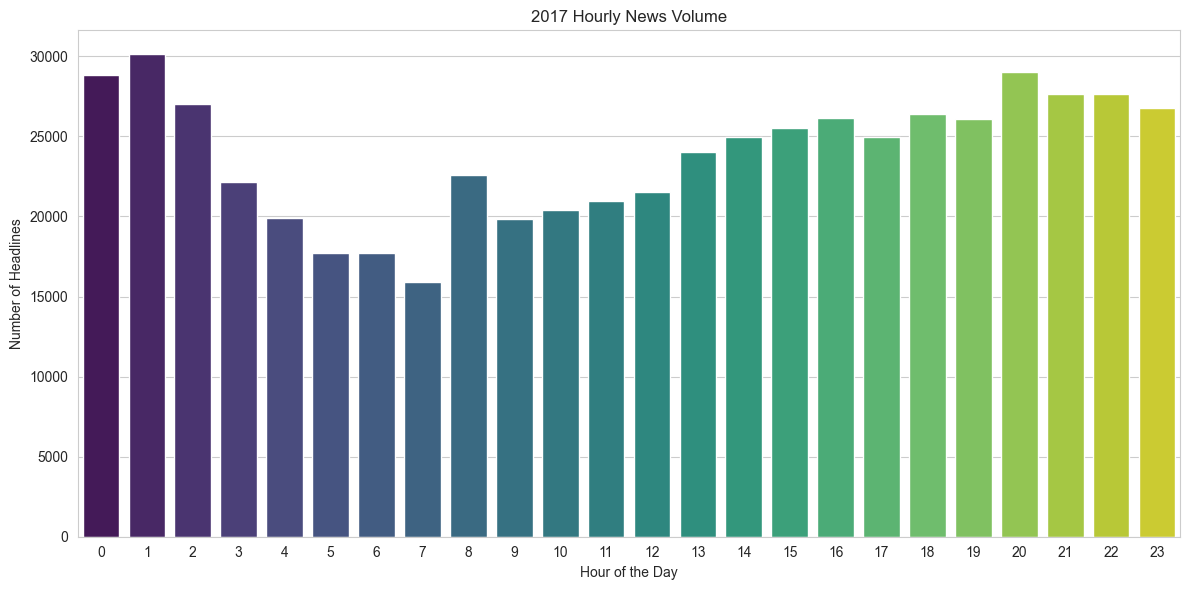

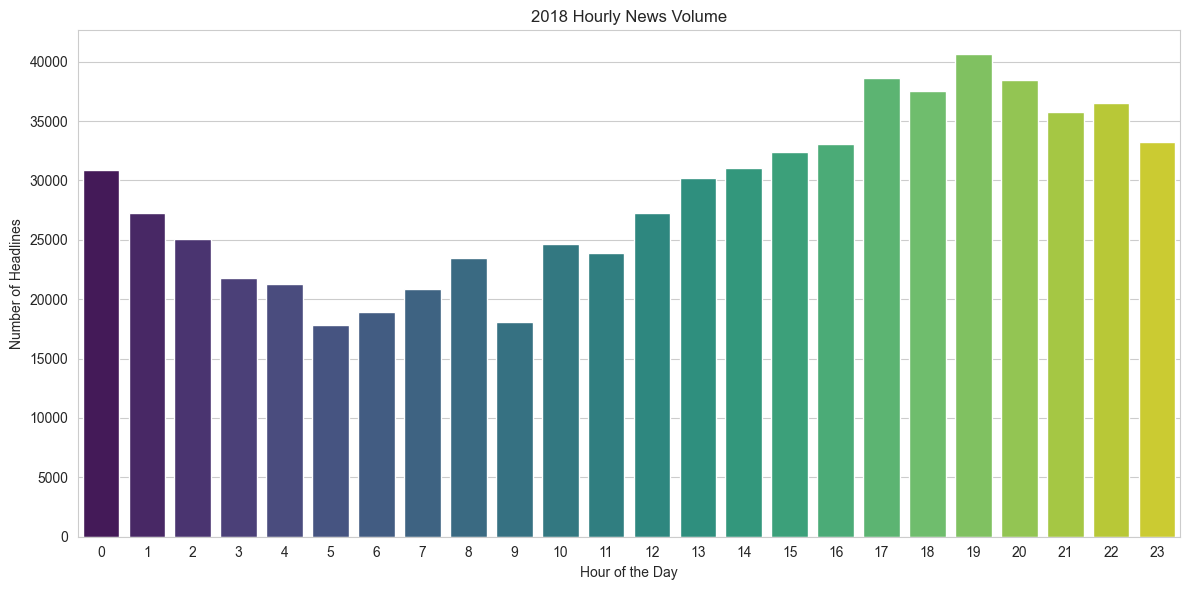

In [20]:
def plot_hourly_news_volume(df, year):
    # Convert 'datetime' to datetime object and create the 'hour' column
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour

    # Calculate hourly volume
    hourly_counts = df.groupby('hour').size().reset_index(name='counts')

    # Initialize and plot the hourly news volume
    plt.figure(figsize=(12, 6))
    sns.barplot(x='hour', y='counts', data=hourly_counts, palette='viridis')
    plt.title(f'{year} Hourly News Volume')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Headlines')
    plt.tight_layout()
    plt.show()

plot_hourly_news_volume(df_2017, 2017)
plot_hourly_news_volume(df_2018, 2018)

## d) Temporal Frequency Analysis ##

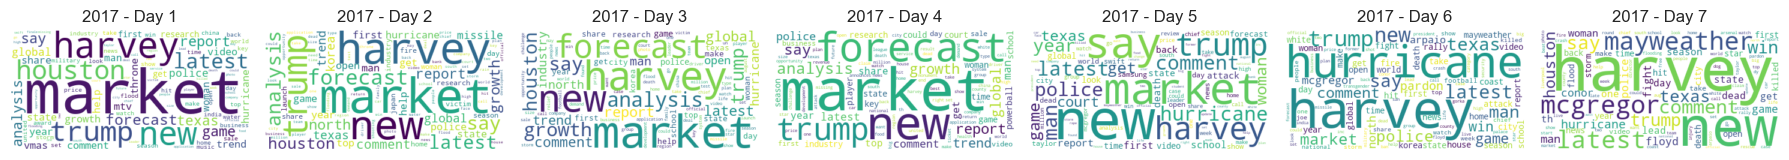

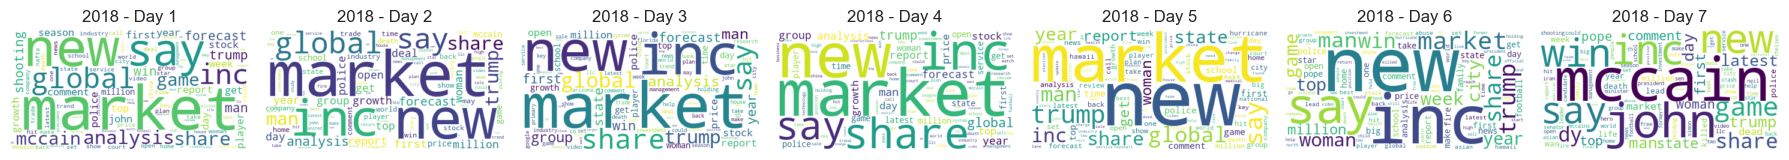

In [21]:
def plot_daily_wordclouds(df, year):
    # Convert 'datetime' to datetime object and create 'day_of_week' column
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['day_of_week'] = df['datetime'].dt.dayofweek

    # Initialize the plot
    fig, axs = plt.subplots(1, 7, figsize=(18, 9))

    # Create Word Clouds for each day of the week
    for day in range(7):
        # Filter the DataFrame for the specific day
        day_df = df[(df['day_of_week'] == day) & (df['datetime'].dt.year == year)]
        
        # Concatenate the headlines into a single text string
        text_day = ' '.join(day_df['cleaned_headline'])
        
        # Calculate TF-IDF scores for words in headlines on this day
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform([text_day])
        tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0]))
        
        # Create a WordCloud for headlines on this day based on TF-IDF scores
        wordcloud = WordCloud(background_color='white', max_words=100).generate_from_frequencies(tfidf_scores)
        
        # Display the WordCloud
        axs[day].imshow(wordcloud, interpolation='bilinear')
        axs[day].axis('off')
        axs[day].set_title(f'{year} - Day {day + 1}')

    # Save the figures
    plt.tight_layout()
    plt.savefig(f'wordclouds_by_day_tfidf_{year}.png')

    # Show the figures
    plt.show()

plot_daily_wordclouds(df_2017, 2017)
plot_daily_wordclouds(df_2018, 2018)

# 4. Advanced Text Analysis #

In [29]:
import pandas as pd
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from gensim.matutils import Sparse2Corpus
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.cluster import KMeans
from collections import Counter
from transformers import BertModel, BertTokenizer
from transformers import DistilBertTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import pipeline
from tqdm.auto import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
np.random.seed(42)

## a) Topic Modeling ##

In [27]:
df_2017 = pd.read_csv('cleaned_df_2017.csv')
df_2018 = pd.read_csv('cleaned_df_2018.csv')
# Ensure that the 'cleaned_headline' column is string
df_2017['cleaned_headline'] = df_2017['cleaned_headline'].astype(str)
df_2018['cleaned_headline'] = df_2018['cleaned_headline'].astype(str)

### Latent Dirichlet Allocation (LDA) ###

Latent Dirichlet Allocation (LDA) is a type of statistical model that is commonly used in natural language processing and machine learning to classify text in a document to a particular topic. It's an unsupervised machine learning technique, which means it doesn't require any prior labels for the documents – it discovers topics on its own.

In [28]:
def lda_topic_modeling(df, num_topics=20, num_words=5):
    # Use CountVectorizer to get the word counts within the documents
    vectorizer = CountVectorizer(stop_words='english')
    data_vectorized = vectorizer.fit_transform(df['cleaned_headline'])

    # Convert sparse matrix to gensim corpus using Sparse2Corpus
    corpus = Sparse2Corpus(data_vectorized, documents_columns=False)

    # Mapping from word IDs to words (to be able to see the actual words)
    id_map = dict((v, k) for k, v in vectorizer.vocabulary_.items())

    # Use the gensim LDA model
    ldamodel = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id_map, passes=25, random_state=34)

    # Show the topics
    topics = ldamodel.print_topics(num_topics=num_topics, num_words=num_words)
    return topics


# Perform LDA topic modeling on df_2017
print("Topics for 2017:")
topics_2017 = lda_topic_modeling(df_2017)
for topic in topics_2017:
    print(topic)

# Perform LDA topic modeling on df_2018
print("\nTopics for 2018:")
topics_2018 = lda_topic_modeling(df_2018)
for topic in topics_2018:
    print(topic)


Topics for 2017:
(0, '0.209*"harvey" + 0.064*"hurricane" + 0.054*"texas" + 0.050*"year" + 0.041*"death"')
(1, '0.091*"comment" + 0.042*"time" + 0.039*"news" + 0.030*"tax" + 0.029*"girl"')
(2, '0.225*"new" + 0.053*"school" + 0.036*"official" + 0.031*"high" + 0.028*"meet"')
(3, '0.111*"houston" + 0.032*"relief" + 0.031*"chief" + 0.026*"india" + 0.022*"case"')
(4, '0.048*"business" + 0.041*"price" + 0.040*"test" + 0.024*"free" + 0.023*"update"')
(5, '0.059*"north" + 0.048*"korea" + 0.038*"victim" + 0.032*"challenge" + 0.030*"launch"')
(6, '0.041*"missile" + 0.038*"hit" + 0.033*"plan" + 0.023*"flooding" + 0.023*"america"')
(7, '0.064*"game" + 0.060*"open" + 0.041*"state" + 0.036*"want" + 0.034*"win"')
(8, '0.077*"make" + 0.059*"video" + 0.046*"season" + 0.034*"south" + 0.034*"look"')
(9, '0.121*"say" + 0.121*"trump" + 0.035*"deal" + 0.030*"court" + 0.028*"leader"')
(10, '0.064*"city" + 0.038*"car" + 0.027*"road" + 0.027*"national" + 0.025*"st"')
(11, '0.053*"group" + 0.041*"change" + 0.041

### Non-negative Matrix Factorization (NMF) ###

Non-negative Matrix Factorization (NMF) in topic modeling is a technique that decomposes a collection of documents into a set of common topics represented as distributions of words, based on the clustering of word frequencies across documents.

In [29]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

def apply_nmf(df):
    headlines = df['cleaned_headline'].values
    # Using TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(headlines)

    # Number of topics
    n_topics = 20
    
    # Run NMF
    nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)
    no_top_words = 10
    display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), no_top_words)
    
    # Assign a topic to each document
    topic_results = nmf.transform(tfidf)
    df['Topic_nmf'] = topic_results.argmax(axis=1)
    print(df[['cleaned_headline', 'Topic_nmf']].head())
    return nmf, df

nmf_2017, df_2017_with_nmf = apply_nmf(df_2017)
nmf_2018, df_2018_with_nmf = apply_nmf(df_2018)

# Save df_2017 and df_2018 to a CSV file
df_2017_with_nmf.to_csv('nmf_topics_df_2017.csv', index=False)
df_2018_with_nmf.to_csv('nmf_topics_df_2018.csv', index=False)

joblib.dump(nmf_2017, 'nmf_model_2017.model')  # Save the 2017 NMF model to disk
joblib.dump(nmf_2018, 'nmf_model_2018.model')  # Save the 2018 NMF model to disk


Topic 0:
market forecast analysis growth trend industry share application size global
Topic 1:
harvey hurricane relief category landfall gas make louisiana effort major
Topic 2:
korea north missile japan launch test option south shortrange table
Topic 3:
new york ceo mexico zealand time library uber business song
Topic 4:
trump pardon arpaio military president donald joe ban transgender white
Topic 5:
latest open people mayor official shelter powerball center county ticket
Topic 6:
game throne season finale watch jon question snow dragon death
Topic 7:
mayweather mcgregor conor floyd fight round money watch tko boxing
Topic 8:
man arrested charged shot killed murder car city accused buckingham
Topic 9:
houston flood flooding water rain harvey home catastrophic floodwaters flooded
Topic 10:
taylor swift video look music mtv award vmas watch single
Topic 11:
say official wont china right chief russia south india expert
Topic 12:
year school comment day high court state win news open
Topi

['nmf_model_2018.model']

## b) Clustering the Topics ##

In [32]:
df_2017 = pd.read_csv('nmf_topics_df_2017.csv')
df_2018 = pd.read_csv('nmf_topics_df_2018.csv')
# # Ensure that the 'cleaned_headline' column is string
df_2017['cleaned_headline'] = df_2017['cleaned_headline'].astype(str)
df_2018['cleaned_headline'] = df_2018['cleaned_headline'].astype(str)

### BERT Embedding for Topics ###

In [33]:
# Convert sentences to BERT embeddings
def get_bert_embeddings(sentences):
    with torch.no_grad():
        embeddings = []
        for sentence in sentences:
            marked_text = "[CLS] " + sentence + " [SEP]"
            tokenized_text = tokenizer.tokenize(marked_text)
            indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
            segments_ids = [1] * len(tokenized_text)

            tokens_tensor = torch.tensor([indexed_tokens])
            segments_tensors = torch.tensor([segments_ids])
            tokens_tensor = tokens_tensor.to(device)
            segments_tensors = segments_tensors.to(device)

            outputs = model(tokens_tensor, segments_tensors)
            hidden_states = outputs[2]

            token_vecs = hidden_states[-2][0]
            sentence_embedding = torch.mean(token_vecs, dim=0)
            embeddings.append(sentence_embedding.numpy())
        return embeddings

In [34]:
topics_2017 = [
    "market forecast analysis growth trend industry share application size global",
    "harvey hurricane relief category landfall gas make louisiana effort major",
    "korea north missile japan launch test option south shortrange table",
    "new york ceo mexico zealand time library uber business song",
    "trump pardon arpaio military president donald joe ban transgender white",
    "latest open people mayor official shelter powerball center county ticket",
    "game throne season finale watch jon question snow dragon death",
    "mayweather mcgregor conor floyd fight round money watch tko boxing",
    "man arrested charged shot killed murder car city accused buckingham",
    "houston flood flooding water rain harvey home catastrophic floodwaters flooded",
    "taylor swift video look music mtv award vmas watch single",
    "say official wont china right chief russia south india expert",
    "year school comment day high court state win news open",
    "report global research market forecast state united health professional survey",
    "texas coast strengthens flood rain prepares category visit harvey flooding",
    "police suspect officer military gear arrest limit attack shooting dutch",
    "storm tropical harvey category strengthens prepares watch gulf strength downgraded",
    "help victim need people medium social rescue harvey flood know",
    "woman missing dead death mccain navy sailor crash search john",
    "food amazon price cut deal monday gas lower close drop"
]

topics_2018 = [
    "market forecast global analysis growth trend industry size application key",
    "man city charged arrested utd mourinho united murder accused death",
    "mccain john sen arizona senator hero dy war mccains cancer",
    "new york fitness healthcare mexico minister announces australia pm prime",
    "trump google house white president donald korea session north search",
    "share sell stock earnings buy bought sold corp post llc",
    "game asian gold video india korea medal team throne final",
    "say plan study tesla musk public iran official china leader",
    "shooting jacksonville dead florida tournament mass suspect video multiple authority",
    "open win serena williams lead season return round th st",
    "school week football high student season preview college best district",
    "deal trade mexico nafta canada talk stock usmexico reach agreement",
    "day labor volume trading news weekend august national start thing",
    "year time prison report ago sentenced rohingya later coming period",
    "million management holding llc position investment group capital stake corp",
    "price target analyst somewhat news exchange hit coverage stock rating",
    "state united ohio arizona california lie islamic capitol report court",
    "latest hawaii hurricane lane death storm rain tropical hit franklin",
    "police woman killed officer crash car arrest death suspect shot",
    "pope abuse ireland sex francis church visit scandal sexual claim"
]

# Append year to each topic
topics = [topic + " (2017)" for topic in topics_2017] + [topic + " (2018)" for topic in topics_2018]

# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()
device = 'cpu'

embeddings = get_bert_embeddings(topics)

### K-means Clustering ###

In [35]:
# Cluster the topics using K-Means
true_k = 6
kmeans_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=5000, n_init=1, random_state=42)
kmeans_model.fit(embeddings)


# Organize topics by cluster
clusters = {i: [] for i in range(true_k)}
for i, label in enumerate(kmeans_model.labels_):
    clusters[label].append(topics[i])

# Print the topics for each cluster
print("Topics per cluster with their year:")
for i in range(true_k):
    print("\nCluster %d:" % i)
    for topic in clusters[i]:
        print(f" - {topic}")

Topics per cluster with their year:

Cluster 0:
 - harvey hurricane relief category landfall gas make louisiana effort major (2017)
 - houston flood flooding water rain harvey home catastrophic floodwaters flooded (2017)
 - texas coast strengthens flood rain prepares category visit harvey flooding (2017)
 - storm tropical harvey category strengthens prepares watch gulf strength downgraded (2017)
 - latest hawaii hurricane lane death storm rain tropical hit franklin (2018)

Cluster 1:
 - market forecast analysis growth trend industry share application size global (2017)
 - report global research market forecast state united health professional survey (2017)
 - market forecast global analysis growth trend industry size application key (2018)
 - share sell stock earnings buy bought sold corp post llc (2018)
 - deal trade mexico nafta canada talk stock usmexico reach agreement (2018)
 - million management holding llc position investment group capital stake corp (2018)
 - price target analy

### Manual Cluster Labeling ###

I manually named the clusters by observing the different topics inside the cluster

In [36]:
# Dictionary mapping cluster number to title
cluster_num_to_title = {
    0: "Natural Disasters & Weather Events",
    1: "Market Trends & Financial Analysis",
    2: "Cultural Events & Education",
    3: "Global Affairs & Social Issues",
    4: "Crime & Legal Matters",
    5: "Sports & Competition"
}

# Print the dictionary to verify
for cluster_num, title in cluster_num_to_title.items():
    print(f"Cluster {cluster_num}: {title}")


Cluster 0: Natural Disasters & Weather Events
Cluster 1: Market Trends & Financial Analysis
Cluster 2: Cultural Events & Education
Cluster 3: Global Affairs & Social Issues
Cluster 4: Crime & Legal Matters
Cluster 5: Sports & Competition


In [37]:
topic_str_to_cluster_year = {topic: cluster_label for topic, cluster_label in zip(topics, kmeans_model.labels_)}

# Create dictionaries that map topic strings to topic numbers for 2017 and 2018
topic_str_to_num_2017 = {topic: i for i, topic in enumerate(topics_2017)}
topic_str_to_num_2018 = {topic: i for i, topic in enumerate(topics_2018)}
topic_str_to_cluster = {key.rsplit(' ', 1)[0]: cluster for key, cluster in topic_str_to_cluster_year.items()}

# Map topic number to cluster number for 2017
topic_num_to_cluster_2017 = {num: topic_str_to_cluster[topic_str] for topic_str, num in topic_str_to_num_2017.items()}

# Map topic number to cluster number for 2018
topic_num_to_cluster_2018 = {num: topic_str_to_cluster[topic_str] for topic_str, num in topic_str_to_num_2018.items()}

print("2017 Topic to Cluster Mapping (Sample):")
for topic_num, cluster_num in list(topic_num_to_cluster_2017.items())[:5]:
    print(f"Topic {topic_num} -> Cluster {cluster_num}")

print("\n2018 Topic to Cluster Mapping (Sample):")
for topic_num, cluster_num in list(topic_num_to_cluster_2018.items())[:5]:
    print(f"Topic {topic_num} -> Cluster {cluster_num}")

# Map each news item's Topic_nmf to its cluster and create a new 'cluster' column for df_2017 and df_2018
df_2017['cluster'] = df_2017['Topic_nmf'].map(topic_num_to_cluster_2017)
df_2018['cluster'] = df_2018['Topic_nmf'].map(topic_num_to_cluster_2018)

2017 Topic to Cluster Mapping (Sample):
Topic 0 -> Cluster 1
Topic 1 -> Cluster 0
Topic 2 -> Cluster 3
Topic 3 -> Cluster 3
Topic 4 -> Cluster 3

2018 Topic to Cluster Mapping (Sample):
Topic 0 -> Cluster 1
Topic 1 -> Cluster 4
Topic 2 -> Cluster 3
Topic 3 -> Cluster 3
Topic 4 -> Cluster 3


### Clusters Visualizations ###

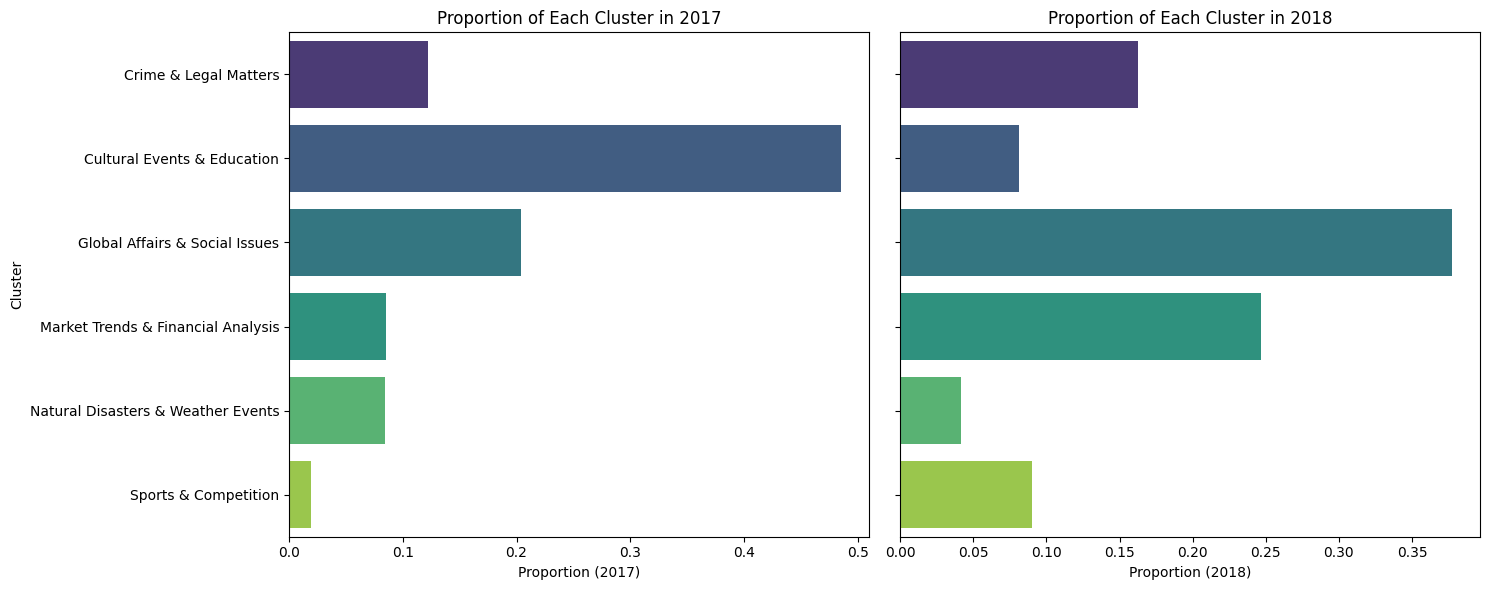

In [38]:
def plot_side_by_side_cluster_proportions(df_2017, df_2018, cluster_num_to_title):
    # Replace cluster numbers with their corresponding names for both years
    df_2017['cluster_name'] = df_2017['cluster'].map(cluster_num_to_title)
    df_2018['cluster_name'] = df_2018['cluster'].map(cluster_num_to_title)

    # Count the occurrences of each cluster for each year
    cluster_counts_2017 = df_2017['cluster_name'].value_counts(normalize=True).sort_index()
    cluster_counts_2018 = df_2018['cluster_name'].value_counts(normalize=True).sort_index()

    # Create a shared y-axis plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Plot for 2017
    sns.barplot(x=cluster_counts_2017.values, y=cluster_counts_2017.index, ax=ax1, palette='viridis')
    ax1.set_title('Proportion of Each Cluster in 2017')
    ax1.set_xlabel('Proportion (2017)')
    ax1.set_ylabel('Cluster')

    # Plot for 2018
    sns.barplot(x=cluster_counts_2018.values, y=cluster_counts_2018.index, ax=ax2, palette='viridis')
    ax2.set_title('Proportion of Each Cluster in 2018')
    ax2.set_xlabel('Proportion (2018)')
    ax2.set_ylabel('')

    plt.tight_layout()
    plt.savefig('clusters_proportions_2017_2018.png')
    plt.show()

plot_side_by_side_cluster_proportions(df_2017, df_2018, cluster_num_to_title)

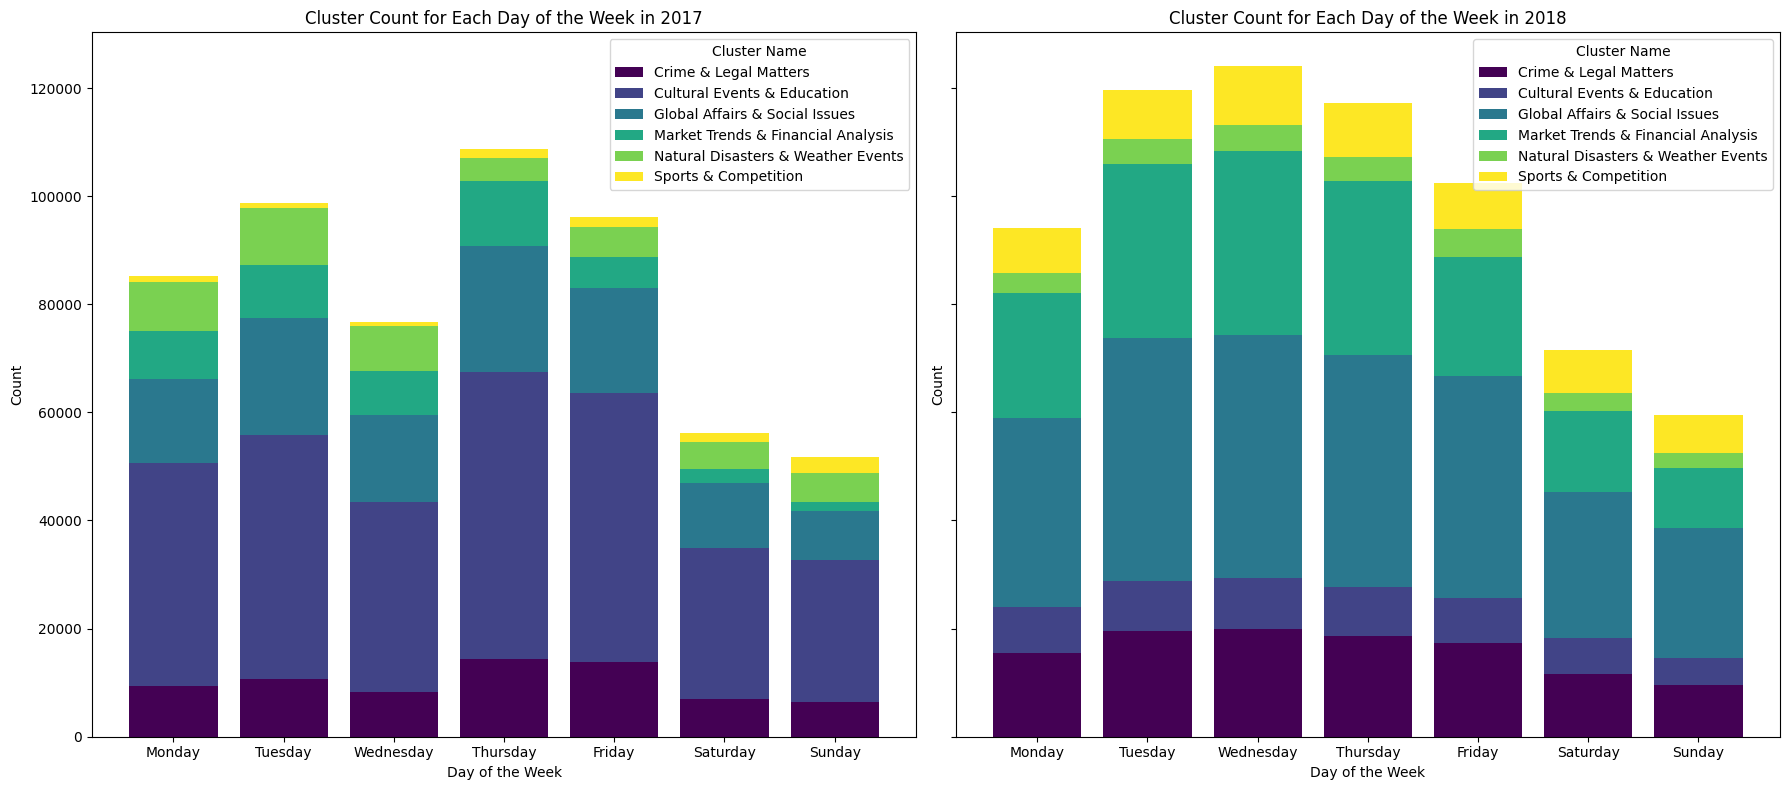

In [39]:
df_2017['datetime'] = pd.to_datetime(df_2017['datetime'])
df_2018['datetime'] = pd.to_datetime(df_2018['datetime'])

# Create a 'day_of_week' column to identify the day of the week (0=Monday, 6=Sunday)
df_2017['day_of_week'] = df_2017['datetime'].dt.dayofweek
df_2018['day_of_week'] = df_2018['datetime'].dt.dayofweek

# Map the day of the week from numbers to names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_2017['day_name'] = df_2017['day_of_week'].map(days_of_week)
df_2018['day_name'] = df_2018['day_of_week'].map(days_of_week)

# Create a function to plot stacked bars
def plot_stacked_bar(df, ax, title):
    # Count the occurrences for each cluster and day
    counts = df.groupby(['day_name', 'cluster_name']).size().unstack(fill_value=0)
    # Sort the days
    counts = counts.reindex(days_of_week.values())
    # Get colors from the 'viridis' colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts.columns)))
    # Create the bottom for the stack
    bottoms = np.zeros(len(counts))
    for cluster, color in zip(counts.columns, colors):
        ax.bar(counts.index, counts[cluster], bottom=bottoms, label=cluster, color=color)
        bottoms += counts[cluster].values
    ax.set_title(title)
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Count')
    ax.legend(title='Cluster Name')

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
# Plot for 2017
plot_stacked_bar(df_2017, axes[0], 'Cluster Count for Each Day of the Week in 2017')
# Plot for 2018
plot_stacked_bar(df_2018, axes[1], 'Cluster Count for Each Day of the Week in 2018')
plt.tight_layout()
plt.show()

In [40]:
# Save df_2017 and df_2018 to a CSV file
df_2017.to_csv('clustering_topics_df_2017.csv', index=False)
df_2018.to_csv('clustering_topics_df_2018.csv', index=False)

## c) Sentiment Analysis ##

In [ ]:
df_2017 = pd.read_csv('clustering_topics_df_2017.csv')
df_2018 = pd.read_csv('clustering_topics_df_2018.csv')
# Ensure that the 'cleaned_headline' column is string
df_2017['cleaned_headline'] = df_2017['cleaned_headline'].astype(str)
df_2018['cleaned_headline'] = df_2018['cleaned_headline'].astype(str)

### DistillBert Model for Sentiment Analysis ###

In [10]:
device = 0 if torch.cuda.is_available() else -1
print(device)
# Initialize the sentiment analysis pipeline
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_analysis = pipeline("sentiment-analysis", model=model_name, device = device)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

def add_sentiment_column(df):
    sentiments = []  # List to hold the sentiment results

    # Use tqdm for progress display
    for text in tqdm(df['cleaned_headline'], desc="Analyzing Sentiments"):
        if isinstance(text, str) and text.strip():
            # Tokenize the text and truncate if necessary
            tokens = tokenizer.tokenize(text)
            max_length = 510  # Reserve space for [CLS] and [SEP]
            if len(tokens) > max_length:
                tokens = tokens[:max_length]
            text = tokenizer.convert_tokens_to_string(tokens)
    
            # Perform sentiment analysis
            result = sentiment_analysis(text)[0]
            sentiment = 'positive' if result['label'] == 'POSITIVE' else 'negative'
        else:
            sentiment = 'unknown'
        
        sentiments.append(sentiment)

    # Add the sentiments as a new column to the DataFrame
    df['sentiment'] = sentiments
    return df

# Apply the function to your dataframes
df_2017 = add_sentiment_column(df_2017)
df_2018 = add_sentiment_column(df_2018)
# Save df_2017 and df_2018 to a CSV file
df_2017.to_csv('sentiment_df_2017.csv', index=False)
df_2018.to_csv('sentiment_df_2018.csv', index=False)

0


Analyzing Sentiments:   0%|          | 0/573721 [00:00<?, ?it/s]

C:\git\Production\algopipeline\.venv\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Analyzing Sentiments:   0%|          | 0/688563 [00:00<?, ?it/s]

C:\git\Production\algopipeline\.venv\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Because it is a long runtime we stored the dataset with the sentiment

In [11]:
df_2017 = pd.read_csv('sentiment_df_2017.csv')
df_2018 = pd.read_csv('sentiment_df_2018.csv')
# Ensure that the 'cleaned_headline' column is string
df_2017['cleaned_headline'] = df_2017['cleaned_headline'].astype(str)
df_2018['cleaned_headline'] = df_2018['cleaned_headline'].astype(str)

In [12]:
positive_count_2017 = df_2017[df_2017['sentiment'] == 'positive']['sentiment'].count()
negative_count_2017 = df_2017[df_2017['sentiment'] == 'negative']['sentiment'].count()

# Count the number of positive and negative sentiments for 2018
positive_count_2018 = df_2018[df_2018['sentiment'] == 'positive']['sentiment'].count()
negative_count_2018 = df_2018[df_2018['sentiment'] == 'negative']['sentiment'].count()

print("Sentiment counts for 2017:")
print("Positive:", positive_count_2017)
print("Negative:", negative_count_2017)

print("\nSentiment counts for 2018:")
print("Positive:", positive_count_2018)
print("Negative:", negative_count_2018)


Sentiment counts for 2017:
Positive: 231041
Negative: 342680

Sentiment counts for 2018:
Positive: 273389
Negative: 415174


In [15]:
# Calculate the ratio of positive to negative sentiments for each year
ratio_2017 = positive_count_2017 / negative_count_2017
ratio_2018 = positive_count_2018 / negative_count_2018

print("Sentiment ratios for 2017:")
print("Positive to Negative Ratio:", ratio_2017)

print("\nSentiment ratios for 2018:")
print("Positive to Negative Ratio:", ratio_2018)


Sentiment ratios for 2017:
Positive to Negative Ratio: 0.6742179292634528

Sentiment ratios for 2018:
Positive to Negative Ratio: 0.6584925838323209


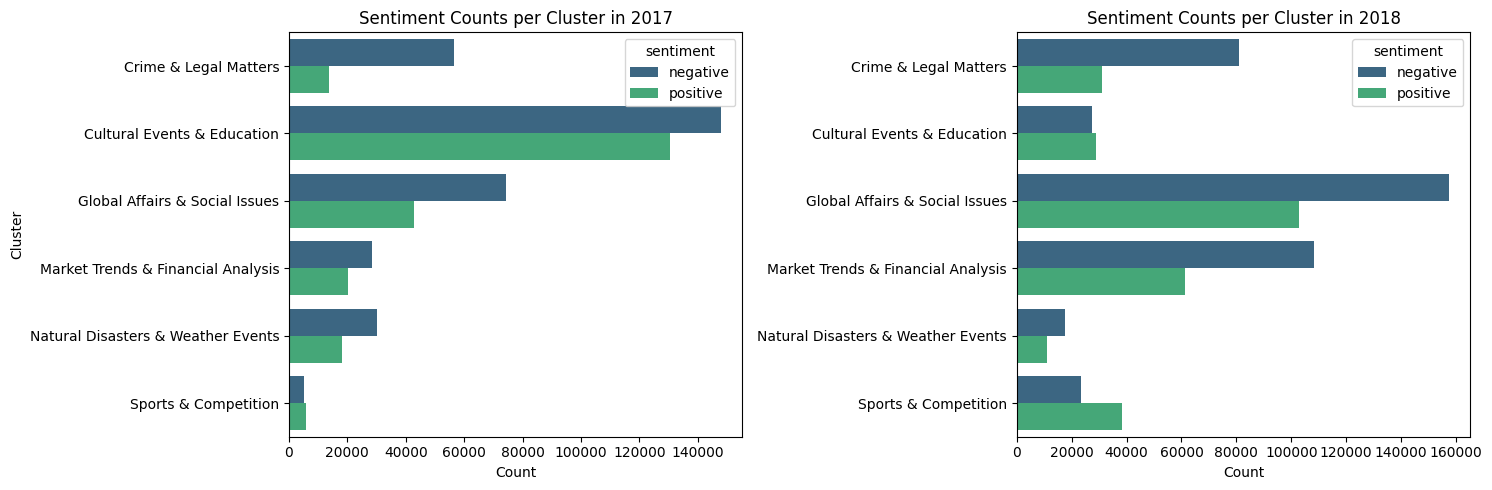

In [16]:
def prepare_sentiment_data(df):
    # Filter out 'unknown' sentiment
    df = df[df['sentiment'] != 'unknown']
    # Count the occurrences of each sentiment within each cluster
    cluster_sentiment_counts = df.groupby(['cluster_name', 'sentiment']).size().reset_index(name='count')
    return cluster_sentiment_counts

# Prepare data for 2017 and 2018
cluster_sentiment_2017 = prepare_sentiment_data(df_2017)
cluster_sentiment_2018 = prepare_sentiment_data(df_2018)

# Create plots with adjusted figure size for better readability
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust the figsize as needed

# Plot for 2017
sns.barplot(y='cluster_name', x='count', hue='sentiment', data=cluster_sentiment_2017, ax=axes[0], palette='viridis')
axes[0].set_title('Sentiment Counts per Cluster in 2017')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Cluster')

# Plot for 2018
sns.barplot(y='cluster_name', x='count', hue='sentiment', data=cluster_sentiment_2018, ax=axes[1], palette='viridis')
axes[1].set_title('Sentiment Counts per Cluster in 2018')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()  # Adjust the layout to accommodate label sizes
plt.savefig('sentiment_counts_per_cluster_2017_2018_viridis_horizontal.png')
plt.show()


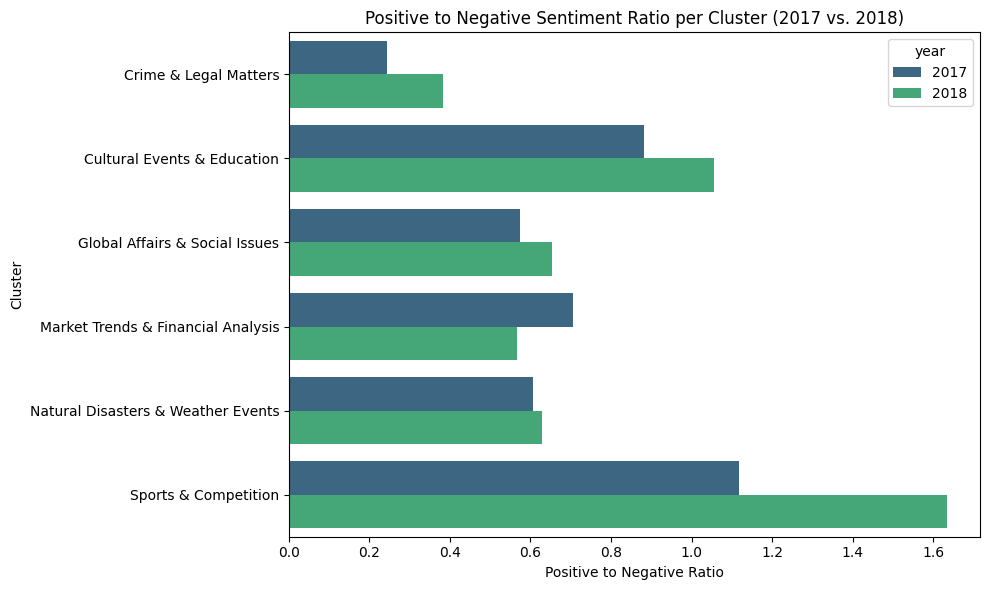

In [17]:
# Calculate the ratio of positive to negative sentiments for each cluster in 2017
ratio_2017_per_cluster = cluster_sentiment_2017.pivot(index='cluster_name', columns='sentiment', values='count')
ratio_2017_per_cluster['positive_to_negative_ratio'] = ratio_2017_per_cluster['positive'] / ratio_2017_per_cluster['negative']

# Calculate the ratio of positive to negative sentiments for each cluster in 2018
ratio_2018_per_cluster = cluster_sentiment_2018.pivot(index='cluster_name', columns='sentiment', values='count')
ratio_2018_per_cluster['positive_to_negative_ratio'] = ratio_2018_per_cluster['positive'] / ratio_2018_per_cluster['negative']


# Calculate the ratio of positive to negative sentiments per cluster name for 2017
ratio_2017_per_cluster = ratio_2017_per_cluster.reset_index()  # Reset the index for merging
ratio_2017_per_cluster['year'] = '2017'

# Calculate the ratio of positive to negative sentiments per cluster name for 2018
ratio_2018_per_cluster = ratio_2018_per_cluster.reset_index()  # Reset the index for merging
ratio_2018_per_cluster['year'] = '2018'

# Combine the data for both years
ratio_combined = pd.concat([ratio_2017_per_cluster, ratio_2018_per_cluster], axis=0)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='cluster_name', x='positive_to_negative_ratio', hue='year', data=ratio_combined, palette='viridis')
ax.set_title('Positive to Negative Sentiment Ratio per Cluster (2017 vs. 2018)')
ax.set_xlabel('Positive to Negative Ratio')
ax.set_ylabel('Cluster')

plt.tight_layout()
plt.savefig('sentiment_ratio_per_cluster_2017_2018_combined_viridis_horizontal.png')
plt.show()


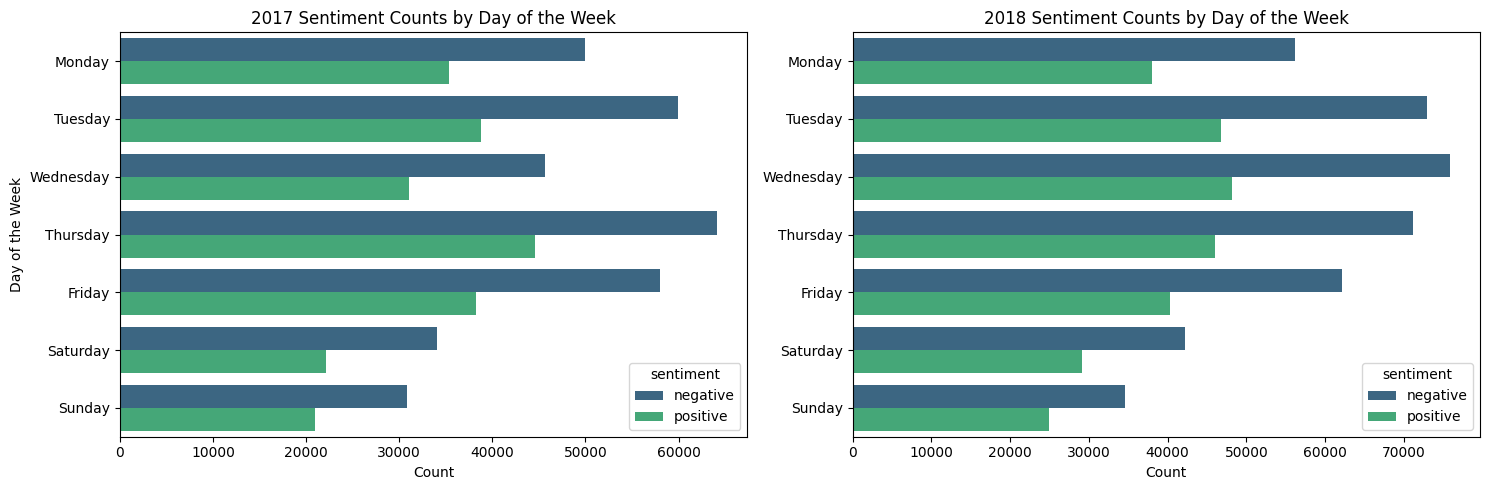

In [19]:
def prepare_sentiment_day_data(df):
    df = df[df['sentiment'] != 'unknown']
    # Count the occurrences of each sentiment within each day
    day_sentiment_counts = df.groupby(['day_name', 'sentiment']).size().reset_index(name='count')
    return day_sentiment_counts

# Prepare data for 2017 and 2018
day_sentiment_2017 = prepare_sentiment_day_data(df_2017)
day_sentiment_2018 = prepare_sentiment_day_data(df_2018)

# Create plots with adjusted figure size for better readability
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust the figsize as needed

# Plot for 2017
sns.barplot(y='day_name', x='count', hue='sentiment', data=day_sentiment_2017, ax=axes[0], palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[0].set_title('2017 Sentiment Counts by Day of the Week')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Day of the Week')

# Plot for 2018
sns.barplot(y='day_name', x='count', hue='sentiment', data=day_sentiment_2018, ax=axes[1], palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].set_title('2018 Sentiment Counts by Day of the Week')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')

plt.tight_layout()  # Adjust the layout to accommodate label sizes
plt.savefig('sentiment_counts_by_day_2017_2018_viridis_horizontal.png')
plt.show()

### Vader SentimentIntensityAnalyzer ###

In [23]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Define a function to calculate VADER sentiment
def get_vader_sentiment(text):
    if isinstance(text, str) and text:
        sentiment_dict = sia.polarity_scores(text)
        return sentiment_dict['compound']
    else:
        return 0 

# Apply the function to calculate sentiment for each headline
tqdm.pandas(desc="Calculating sentiment for 2017")
df_2017['sentiment_vader'] = df_2017['cleaned_headline'].progress_apply(get_vader_sentiment)

tqdm.pandas(desc="Calculating sentiment for 2018")
df_2018['sentiment_vader'] = df_2018['cleaned_headline'].progress_apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sharonsalabi\AppData\Roaming\nltk_data...


Calculating sentiment for 2017:   0%|          | 0/573721 [00:00<?, ?it/s]

Calculating sentiment for 2018:   0%|          | 0/688563 [00:00<?, ?it/s]

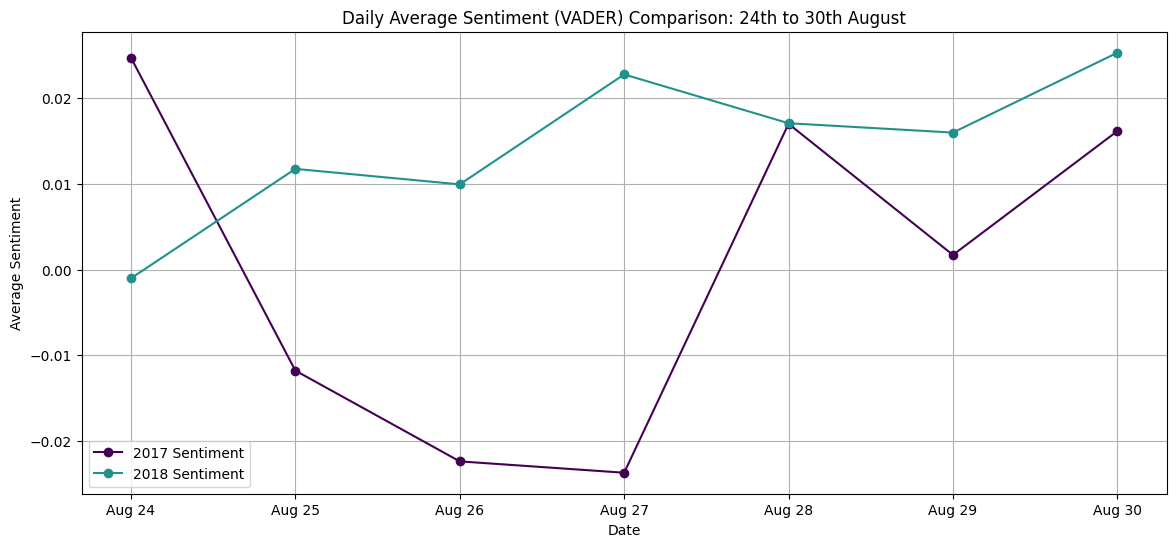

In [25]:
df_2017['datetime'] = pd.to_datetime(df_2017['datetime'])
df_2018['datetime'] = pd.to_datetime(df_2018['datetime'])
df_2017 = df_2017.set_index('datetime')
df_2018 = df_2018.set_index('datetime')

common_week_2017 = df_2017.loc['2017-08-24':'2017-08-30']
common_week_2018 = df_2018.loc['2018-08-24':'2018-08-30']

# Calculate the mean sentiment for each day
daily_sentiment_2017 = common_week_2017['sentiment_vader'].resample('D').mean()
daily_sentiment_2018 = common_week_2018['sentiment_vader'].resample('D').mean()

# Remove the year from the index for direct comparison
daily_sentiment_2017.index = daily_sentiment_2017.index.strftime('%b %d')
daily_sentiment_2018.index = daily_sentiment_2018.index.strftime('%b %d')


# Plotting the time series sentiment on the same subplot
plt.figure(figsize=(14, 6))

# Plot for 2017 with Viridis palette
plt.plot(daily_sentiment_2017, label='2017 Sentiment', color=plt.cm.viridis(0), marker='o')

# Plot for 2018 with Viridis palette
plt.plot(daily_sentiment_2018, label='2018 Sentiment', color=plt.cm.viridis(0.5), marker='o')

plt.title('Daily Average Sentiment (VADER) Comparison: 24th to 30th August')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.legend()
plt.grid(True)

plt.show()


### TextBlob Subjectivity ###

In [30]:
# Function to calculate subjectivity
def calculate_subjectivity(text):
    # Check if the text is a string and not empty or NaN
    if isinstance(text, str) and text:
        return TextBlob(text).sentiment.subjectivity
    else:
        return 0 

tqdm.pandas(desc="Calculating sentiment for 2017")
df_2017['subjectivity_textblob'] = df_2017['cleaned_headline'].progress_apply(calculate_subjectivity)

tqdm.pandas(desc="Calculating sentiment for 2018")
df_2018['subjectivity_textblob'] = df_2018['cleaned_headline'].progress_apply(calculate_subjectivity)

Calculating sentiment for 2017:   0%|          | 0/573721 [00:00<?, ?it/s]

Calculating sentiment for 2018:   0%|          | 0/688563 [00:00<?, ?it/s]

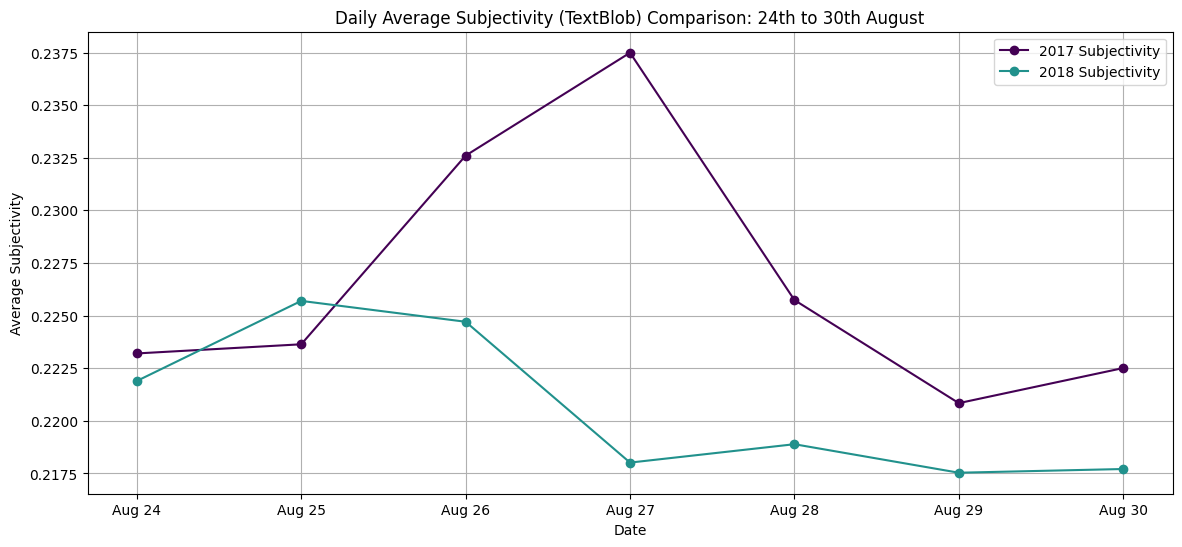

In [31]:
# Filter the data for the common week (24th August to 30th August)
common_week_2017 = df_2017.loc['2017-08-24':'2017-08-30']
common_week_2018 = df_2018.loc['2018-08-24':'2018-08-30']

# Calculate the mean sentiment for each day
daily_sentiment_2017 = common_week_2017['subjectivity_textblob'].resample('D').mean()
daily_sentiment_2018 = common_week_2018['subjectivity_textblob'].resample('D').mean()

# Remove the year from the index for direct comparison
daily_sentiment_2017.index = daily_sentiment_2017.index.strftime('%b %d')
daily_sentiment_2018.index = daily_sentiment_2018.index.strftime('%b %d')

# Plotting the time series sentiment on the same subplot
plt.figure(figsize=(14, 6))

# Plot for 2017
plt.plot(daily_sentiment_2017, label='2017 Subjectivity', color=plt.cm.viridis(0), marker='o')

# Plot for 2018
plt.plot(daily_sentiment_2018, label='2018 Subjectivity', color=plt.cm.viridis(0.5), marker='o')

plt.title('Daily Average Subjectivity (TextBlob) Comparison: 24th to 30th August')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.legend()
plt.grid(True)

plt.show()